# Robustness evaluation

In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import parcoords
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
path = "C:/Users/busko/OneDrive - Delft University of Technology/TU Delft/Engineering Policy Analysis (EPA)/Year 2/Afstuderen/Results cloud services/"

experiments1 = pd.read_csv(path + 'results1/experiments.csv')
experiments2 = pd.read_csv(path + 'results2/experiments.csv')
experiments3 = pd.read_csv(path + 'results3/experiments.csv')
experiments4 = pd.read_csv(path + 'results4/experiments.csv')
experiments5 = pd.read_csv(path + 'results5/experiments.csv')

experiments = pd.concat([experiments1, experiments2, experiments3, experiments4, experiments5], ignore_index=True)

multiple_outcome_dfs = []

for i in range(5):
    print(i)
    outcomes_df = pd.DataFrame()
    irri = np.load(path + f'results{i+1}/j_irri.npy')
    reliability = np.load(path +  f'results{i+1}/j_energy_reliability.npy')
    flood = np.load(path +  f'results{i+1}/j_fldcntrl.npy')
    akosombo = np.load(path +  f'results{i+1}/j_hyd_a.npy')
    kpong = np.load(path +  f'results{i+1}/j_hyd_kp.npy')
    environ = pd.read_csv(path +  f'results{i+1}/j_env.csv', header=None).values
    
    outcomes_df['j_hyd_a'] = akosombo.tolist()
    outcomes_df['j_hyd_kp'] = kpong.tolist()
    outcomes_df['j_energy_reliability'] = reliability.tolist()
    outcomes_df['j_irri'] = irri.tolist()
    outcomes_df['j_env'] = environ.tolist()
    outcomes_df['j_fldcntrl'] = flood.tolist()
    
    multiple_outcome_dfs.append(outcomes_df)
    
combined_outcomes_df = pd.concat([multiple_outcome_dfs[0], multiple_outcome_dfs[1], multiple_outcome_dfs[2], multiple_outcome_dfs[3], multiple_outcome_dfs[4]], ignore_index=True)
outcomes_df = combined_outcomes_df
combined = pd.concat([experiments, outcomes_df], axis=1)

0
1
2
3
4


In [3]:
#Selection of percentage from all years (50x20=1000 outcome values per metric)
returnT = pd.DataFrame(data=np.zeros(1))
returnT['j_env'] = 1/30 # low is bad
returnT['j_hyd_a'] = 1/20 # low is bad
returnT['j_hyd_kp'] = 1/20 # low is bad
returnT['j_irri'] = 1/30 # low is bad
returnT['j_fldcntrl'] = 1-1/100 #  high is bad
returnT['j_energy_reliability'] = 1-1/10 #High is bad

combined_returnT = combined.copy()
for key in outcomes_df.columns:
    combined_returnT[key] = combined[key].apply(lambda x : np.percentile(x, returnT[key][0]*100))

In [4]:
combined_returnT

Cjanuary  Cfebruary    Cmarch    Capril      Cmay     Cjune     Cjuly  \
0      0.985743   0.003123 -0.200545 -0.178750 -0.009715  0.168004 -0.139730   
1      0.953190  -0.040667 -0.035676 -0.150909  0.139534  0.444374 -0.106509   
2      0.518526  -0.239087 -0.067734  0.015299  0.000377  0.536831 -0.130760   
3      0.563093  -0.219798 -0.142214 -0.031872  0.024686  0.544057 -0.148432   
4      0.806969  -0.181960 -0.065449 -0.130500 -0.005875  0.113574 -0.122951   
...         ...        ...       ...       ...       ...       ...       ...   
21595  0.429194  -0.026662  0.028634 -0.021078 -0.055199  0.455868 -0.137495   
21596  0.507912  -0.196188 -0.184409  0.018254 -0.035801  0.388640 -0.109745   
21597  0.695285  -0.089233 -0.133375 -0.028964  0.033399  0.398786 -0.119906   
21598  0.584620  -0.006900 -0.170951 -0.118589 -0.034674  0.512193 -0.132515   
21599  0.405145  -0.162596  0.004840  0.022429 -0.007152  0.366050 -0.132396   

        Caugust  Cseptember  Coctober  ...  treatiesTogo  scenario  policy  \
0     -0.024965    0.346693  0.345195  ...      0.967810         0    None   
1     -0.067755    0.312016  0.404027  ...      0.720480         1    None   
2      0.031952    0.380936  0.441261  ...      0.762191         2    None   
3      0.011861    0.252158  0.245478  ...      0.194052         3    None   
4      0.159576    0.260885  0.390893  ...      0.793389         4    None   
...         ...         ...       ...  ...           ...       ...     ...   
21595  0.127796    0.286891  0.404333  ...      0.292785      2395    None   
21596 -0.015621    0.270670  0.313450  ...      0.210785      2396    None   
21597  0.065682    0.281060  0.259264  ...      0.777875      2397    None   
21598  0.148560    0.298228  0.418536  ...      0.652203      2398    None   
21599 -0.051065    0.298041  0.233576  ...      0.268819      2399    None   

                     model      j_hyd_a    j_hyd_kp  j_energy_reliability  \
0      ReleasePol0Set50x20  2952.286542  582.773285           7461.912761   
1      ReleasePol0Set50x20  3029.353644  593.876053           4626.549944   
2      ReleasePol0Set50x20  3058.584244  600.168373           8445.733370   
3      ReleasePol0Set50x20  2403.905076  482.205619          11623.383040   
4      ReleasePol0Set50x20  2995.276084  589.792655           5199.323706   
...                    ...          ...         ...                   ...   
21595  ReleasePol8Set50x20  2834.566855  541.584092           8851.987116   
21596  ReleasePol8Set50x20  2703.224670  535.516709           9916.583716   
21597  ReleasePol8Set50x20  2966.901667  580.508526          16049.736531   
21598  ReleasePol8Set50x20  3077.035661  585.785548           6218.407611   
21599  ReleasePol8Set50x20  2208.119041  438.156467          15952.875985   

         j_irri     j_env  j_fldcntrl  
0      0.049476  0.495986    0.052491  
1      0.050194  0.477055    0.060898  
2      0.051193  0.471434    0.062600  
3      0.045566  0.492027    0.001729  
4      0.050926  0.503977    0.027992  
...         ...       ...         ...  
21595  0.529476  0.624658    0.061736  
21596  0.542041  0.624658    0.033882  
21597  0.577024  0.624658    0.051652  
21598  0.565195  0.624658    0.153655  
21599  0.469698  0.624658    0.006009  

[21600 rows x 31 columns]

In [5]:
outcomes_dfT = pd.DataFrame()
for key in outcomes_df.columns:
    outcomes_dfT[key] = combined_returnT[key]

In [6]:
def WP1():
    overall_scores = {}
    for policy in np.unique(experiments['model']):
        scores = {}

        for outcome in outcomes_df.columns:
            data  = combined_returnT[combined_returnT['model']== policy][outcome].values
            if outcome == 'j_fldcntrl' or outcome == 'j_energy_reliability':
                robust_score_outcome = np.percentile(data, 99)
            else:
                robust_score_outcome = np.percentile(data, 1)
            scores[outcome] = robust_score_outcome
        overall_scores[policy] = scores
    scores = pd.DataFrame.from_dict(overall_scores).T
    return scores

def minimax_regret90():
    overall_regret = {}
    max_regret = {}
    
    scores = pd.DataFrame(columns=outcomes_df.columns, index=np.unique(experiments['model']))
    
    for outcome in outcomes_df.columns:
        policy_column = experiments['policy']

        # create a DataFrame with all the relevent information
        # i.e., policy, scenario_id, and scores
        data = pd.DataFrame({outcome: outcomes_dfT[outcome], 
                             "policy":experiments['model'],
                             "scenario":experiments['scenario']})

        # reorient the data by indexing with policy and scenario id
        data = data.pivot(index='scenario', columns='policy')

        # flatten the resulting hierarchical index resulting from 
        # pivoting, (might be a nicer solution possible)
        data.columns = data.columns.get_level_values(1)

        # we need to control the broadcasting. 
        # max returns a 1d vector across scenario id. By passing
        # np.newaxis we ensure that the shape is the same as the data
        # next we take the absolute value
        #
        # basically we take the difference of the maximum across 
        # the row and the actual values in the row
        #
        
        if outcome == 'j_fldcntrl' or outcome == 'j_energy_reliability':
            outcome_regret = (data.min(axis=1)[:, np.newaxis] - data).abs()
        else:
            outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()

        overall_regret[outcome] = outcome_regret
        max_regret[outcome] = outcome_regret.max()
        for policy in np.unique(experiments['model']):    
            scores[outcome][policy] = np.percentile(outcome_regret[policy], 90)
    return scores

def mean_variance():
    overall_scores = {}
    for policy in np.unique(experiments['model']):
        scores = {}

        for outcome in outcomes_df.columns:
            data  = combined_returnT[combined_returnT['model']== policy][outcome].values
            
            mean = np.mean(data)
            std = np.std(data)
            
            if outcome == 'j_fldcntrl' or outcome == 'j_energy_reliability':
                robust_score_outcome = (mean+1) * (std+1)
            else:
                robust_score_outcome =(mean+1)/(std+1)
            scores[outcome] = robust_score_outcome
        overall_scores[policy] = scores
    scores = pd.DataFrame.from_dict(overall_scores).T
    return scores
    
def percentile_based_peakedness():
    overall_scores = {}
    for policy in np.unique(experiments['model']):
        scores = {}

        for outcome in outcomes_df.columns:
            data  = combined_returnT[combined_returnT['model']== policy][outcome].values
            q10 = np.percentile(data, 10)
            q25 = np.percentile(data, 25)
            q75 = np.percentile(data, 75)
            q90 = np.percentile(data, 90)
            peakedness = (q90 - q10) / (q75-q25)
            
            if outcome == 'j_fldcntrl' or outcome == 'j_energy_reliability':
                meanpeak = data.mean() / peakedness
            else:
                meanpeak = data.mean() * peakedness
            
            #higher peakedness is better
            robust_score_outcome = meanpeak #peakedness
            scores[outcome] = robust_score_outcome
        overall_scores[policy] = scores
    scores = pd.DataFrame.from_dict(overall_scores).T
    return scores

In [7]:
WP1_df = WP1()
WP1_df

j_hyd_a    j_hyd_kp  j_energy_reliability    j_irri  \
ReleasePol0Set50x20  2278.574359  456.880477          22479.144196  0.044396   
ReleasePol1Set50x20  1859.761574  348.497512          25001.957697  0.496719   
ReleasePol2Set50x20  1747.744591  323.127711          26981.131343  0.540273   
ReleasePol3Set50x20  2155.901658  421.469308          23717.439016  0.376435   
ReleasePol4Set50x20  2153.194252  419.629707          23221.204874  0.403298   
ReleasePol5Set50x20  2141.709663  418.799095          23418.055055  0.414358   
ReleasePol6Set50x20  2145.518919  421.404205          23865.409098  0.372279   
ReleasePol7Set50x20  2148.057469  418.977971          23578.054047  0.402381   
ReleasePol8Set50x20  2178.431941  423.724551          23244.455728  0.436978   

                        j_env  j_fldcntrl  
ReleasePol0Set50x20  0.468762    0.098794  
ReleasePol1Set50x20  0.802698    0.163866  
ReleasePol2Set50x20  0.794446    0.168238  
ReleasePol3Set50x20  0.638356    0.155334  
ReleasePol4Set50x20  0.643836    0.157053  
ReleasePol5Set50x20  0.643836    0.157129  
ReleasePol6Set50x20  0.643836    0.157138  
ReleasePol7Set50x20  0.646575    0.154570  
ReleasePol8Set50x20  0.624658    0.151994

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

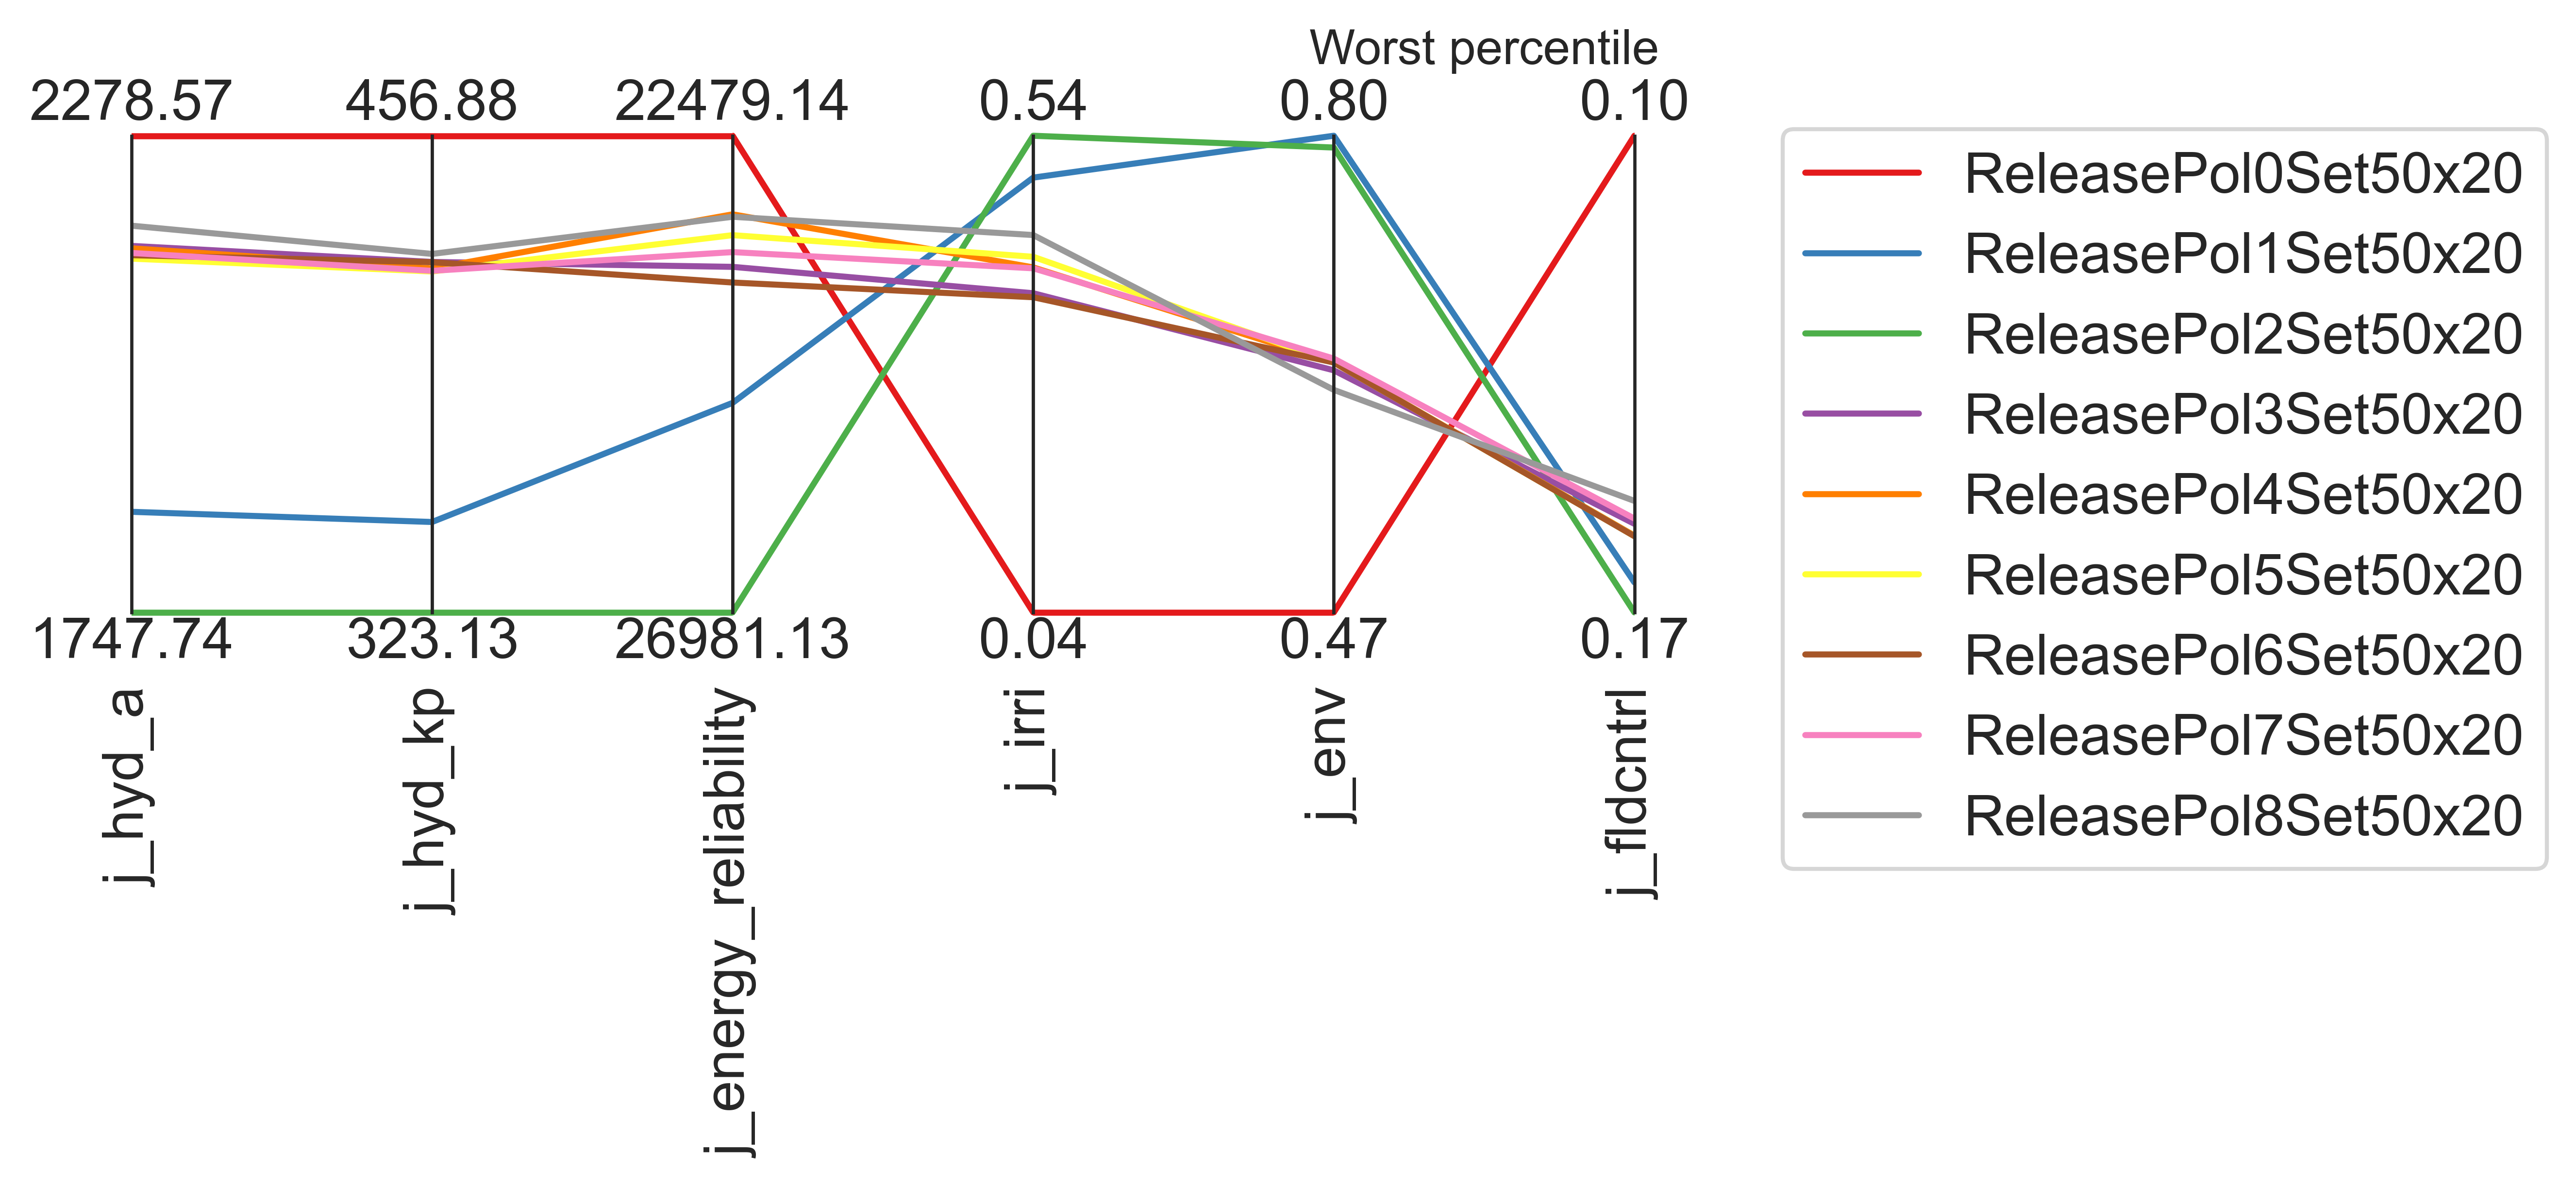

In [9]:
colors = plt.cm.Set1(np.linspace(0, 1,9))
data = WP1_df

limits = parcoords.get_limits(data)
# limits.loc[0, outcomes.keys()] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()
plt.title('Worst percentile')
paraxes.invert_axis('j_energy_reliability')
paraxes.invert_axis('j_fldcntrl')


plt.savefig('figures/robustness/WP1.png', dpi=300)    
plt.show()

In [10]:
minimax_regret90_df = minimax_regret90()
minimax_regret90_df

j_hyd_a    j_hyd_kp j_energy_reliability    j_irri  \
ReleasePol0Set50x20     9.478572         0.0                  0.0   0.57931   
ReleasePol1Set50x20  1016.047661  223.262304         15269.806775  0.071126   
ReleasePol2Set50x20  1143.226593  250.803179          16911.63857       0.0   
ReleasePol3Set50x20   165.898944   47.996561          3837.468833  0.157493   
ReleasePol4Set50x20   185.389691    52.90326          3641.886047  0.124149   
ReleasePol5Set50x20    184.18652   53.613547          3978.842145   0.10913   
ReleasePol6Set50x20    170.61936   48.862703           3975.93967  0.159184   
ReleasePol7Set50x20    176.84415   51.283547          4002.532387  0.122633   
ReleasePol8Set50x20   153.572842   47.781644          3274.181807  0.086509   

                        j_env j_fldcntrl  
ReleasePol0Set50x20  0.336881        0.0  
ReleasePol1Set50x20       0.0   0.048253  
ReleasePol2Set50x20  0.010864   0.054225  
ReleasePol3Set50x20  0.194521   0.037041  
ReleasePol4Set50x20  0.189041   0.039628  
ReleasePol5Set50x20  0.189041     0.0396  
ReleasePol6Set50x20  0.189041   0.037159  
ReleasePol7Set50x20  0.186301   0.037023  
ReleasePol8Set50x20  0.208219   0.033634

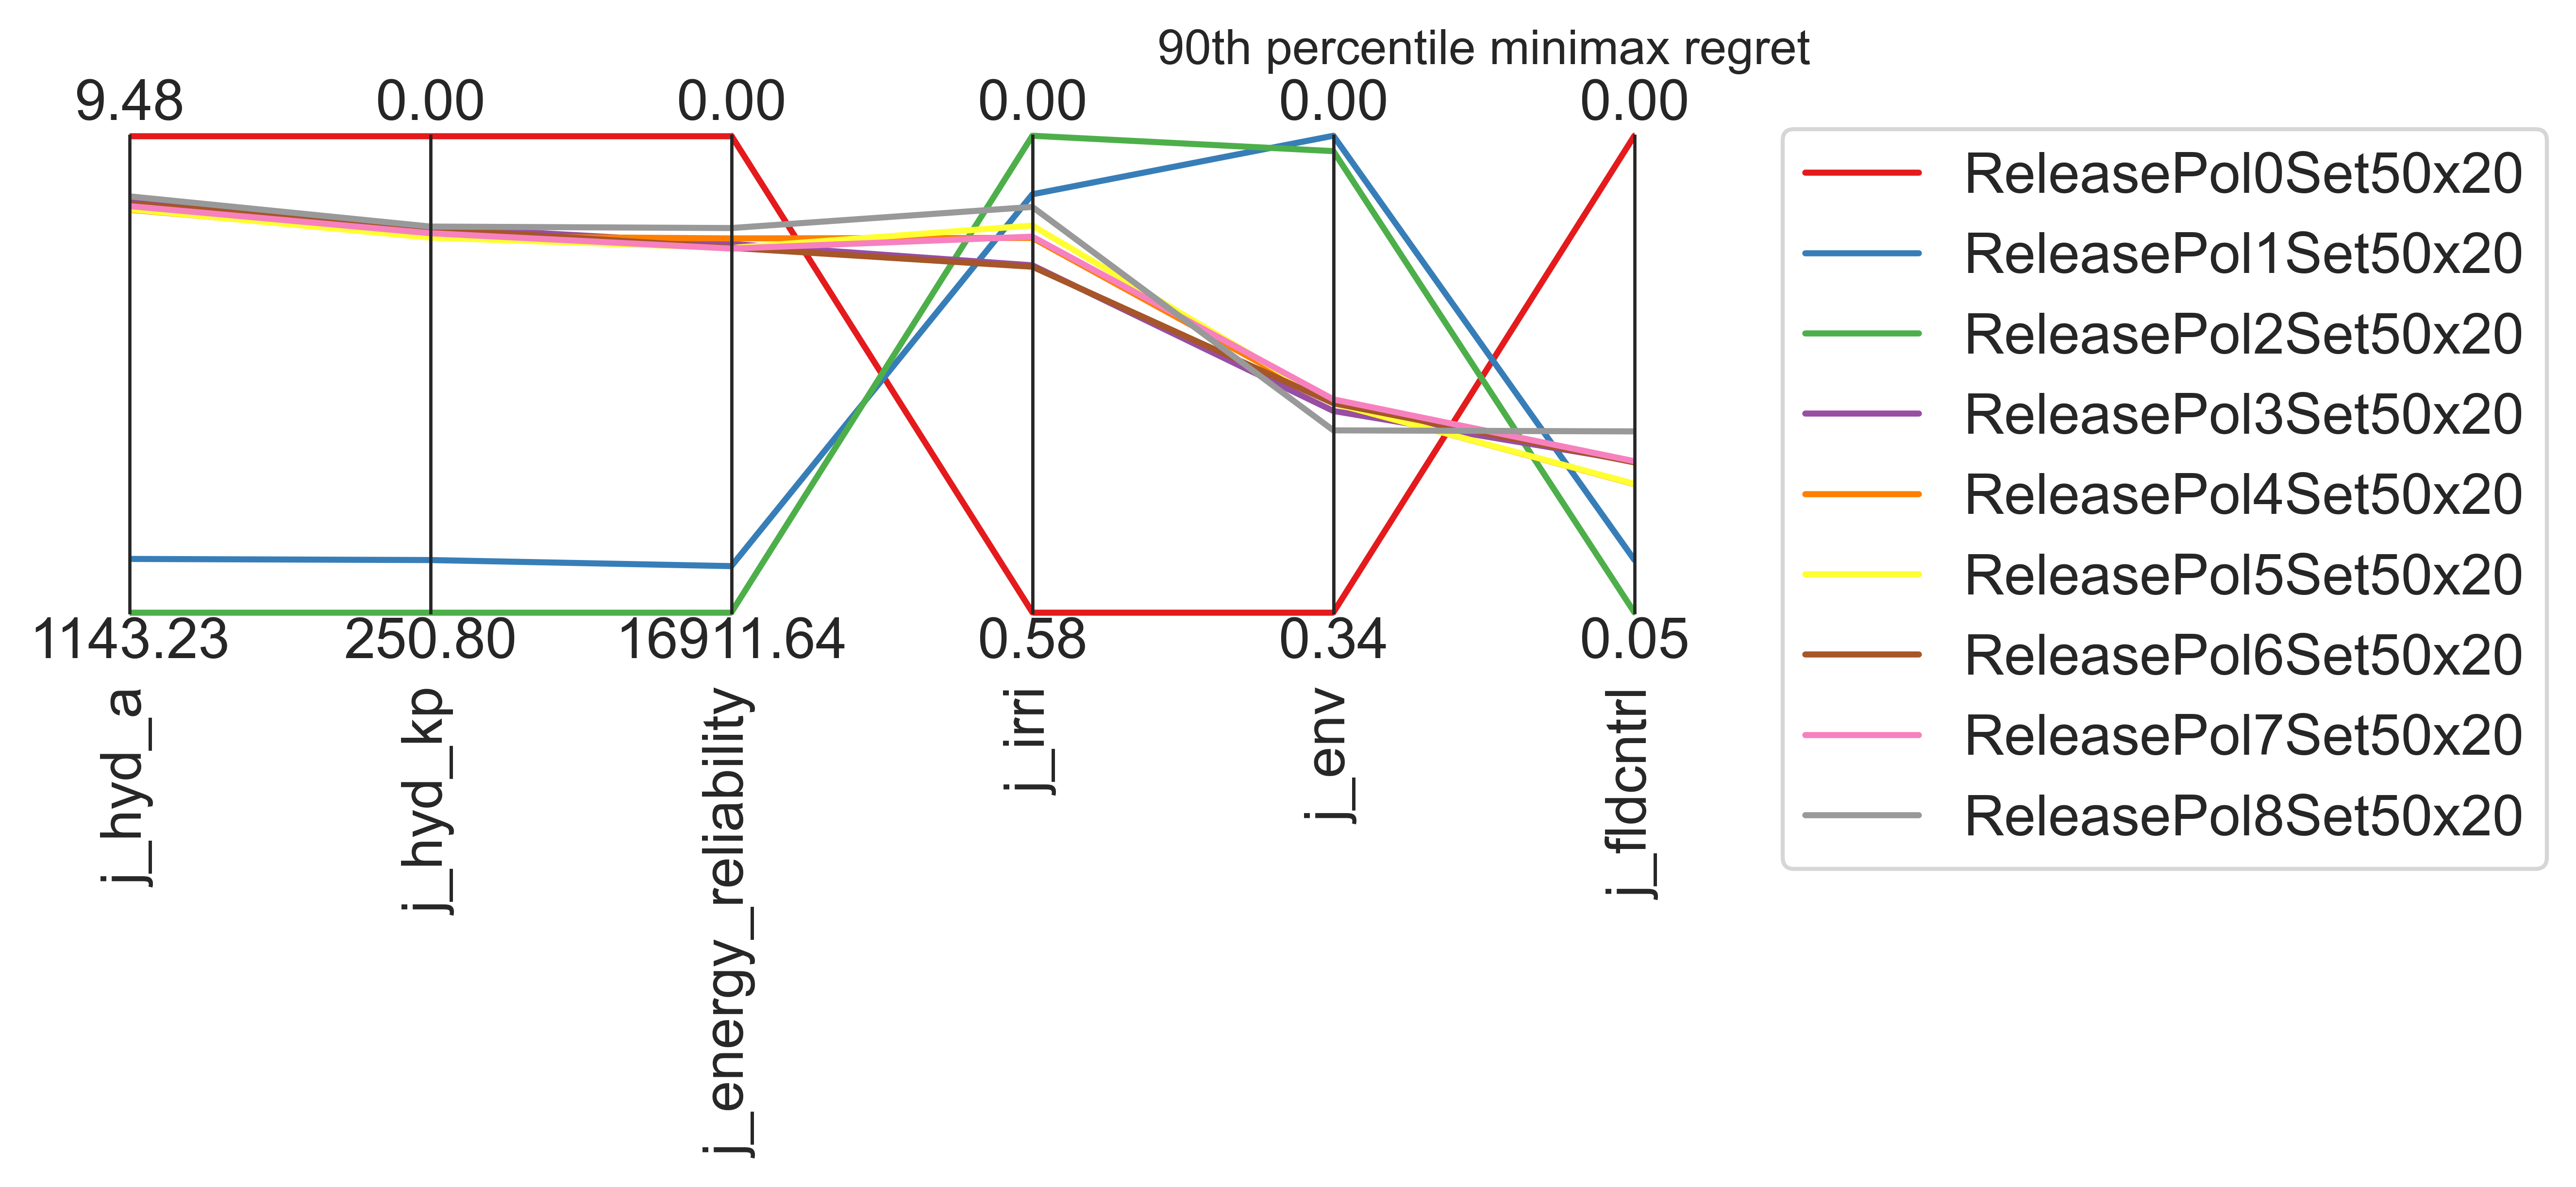

In [11]:
data = minimax_regret90_df

limits = parcoords.get_limits(minimax_regret90_df.max())
limits[0] = parcoords.get_limits(minimax_regret90_df.min())[0]
limits = limits.T
# limits.loc[0, outcomes.keys()] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()
plt.title('90th percentile minimax regret')
paraxes.invert_axis(data.columns)

plt.savefig('figures/robustness/90pRegret.png', dpi=300)    

plt.show()

In [12]:
mean_variance_df=mean_variance()
mean_variance_df

j_hyd_a   j_hyd_kp  j_energy_reliability    j_irri  \
ReleasePol0Set50x20  15.696408  16.608156          4.569198e+07  1.046927   
ReleasePol1Set50x20  40.941104  44.843297          2.221920e+07  1.509460   
ReleasePol2Set50x20  39.561758  43.055571          2.471871e+07  1.556551   
ReleasePol3Set50x20  12.322629  12.384790          5.443657e+07  1.418071   
ReleasePol4Set50x20  12.379163  12.384325          5.060629e+07  1.449350   
ReleasePol5Set50x20  12.382524  12.391528          5.237978e+07  1.462797   
ReleasePol6Set50x20  12.504774  12.633551          5.442509e+07  1.417121   
ReleasePol7Set50x20  12.423310  12.492189          5.346856e+07  1.451200   
ReleasePol8Set50x20  12.231414  12.178707          5.176819e+07  1.482053   

                        j_env  j_fldcntrl  
ReleasePol0Set50x20  1.475492    1.056607  
ReleasePol1Set50x20  1.799061    1.101708  
ReleasePol2Set50x20  1.790535    1.106047  
ReleasePol3Set50x20  1.638356    1.091517  
ReleasePol4Set50x20  1.643836    1.094055  
ReleasePol5Set50x20  1.643836    1.093721  
ReleasePol6Set50x20  1.643836    1.092131  
ReleasePol7Set50x20  1.646575    1.091629  
ReleasePol8Set50x20  1.624658    1.088220

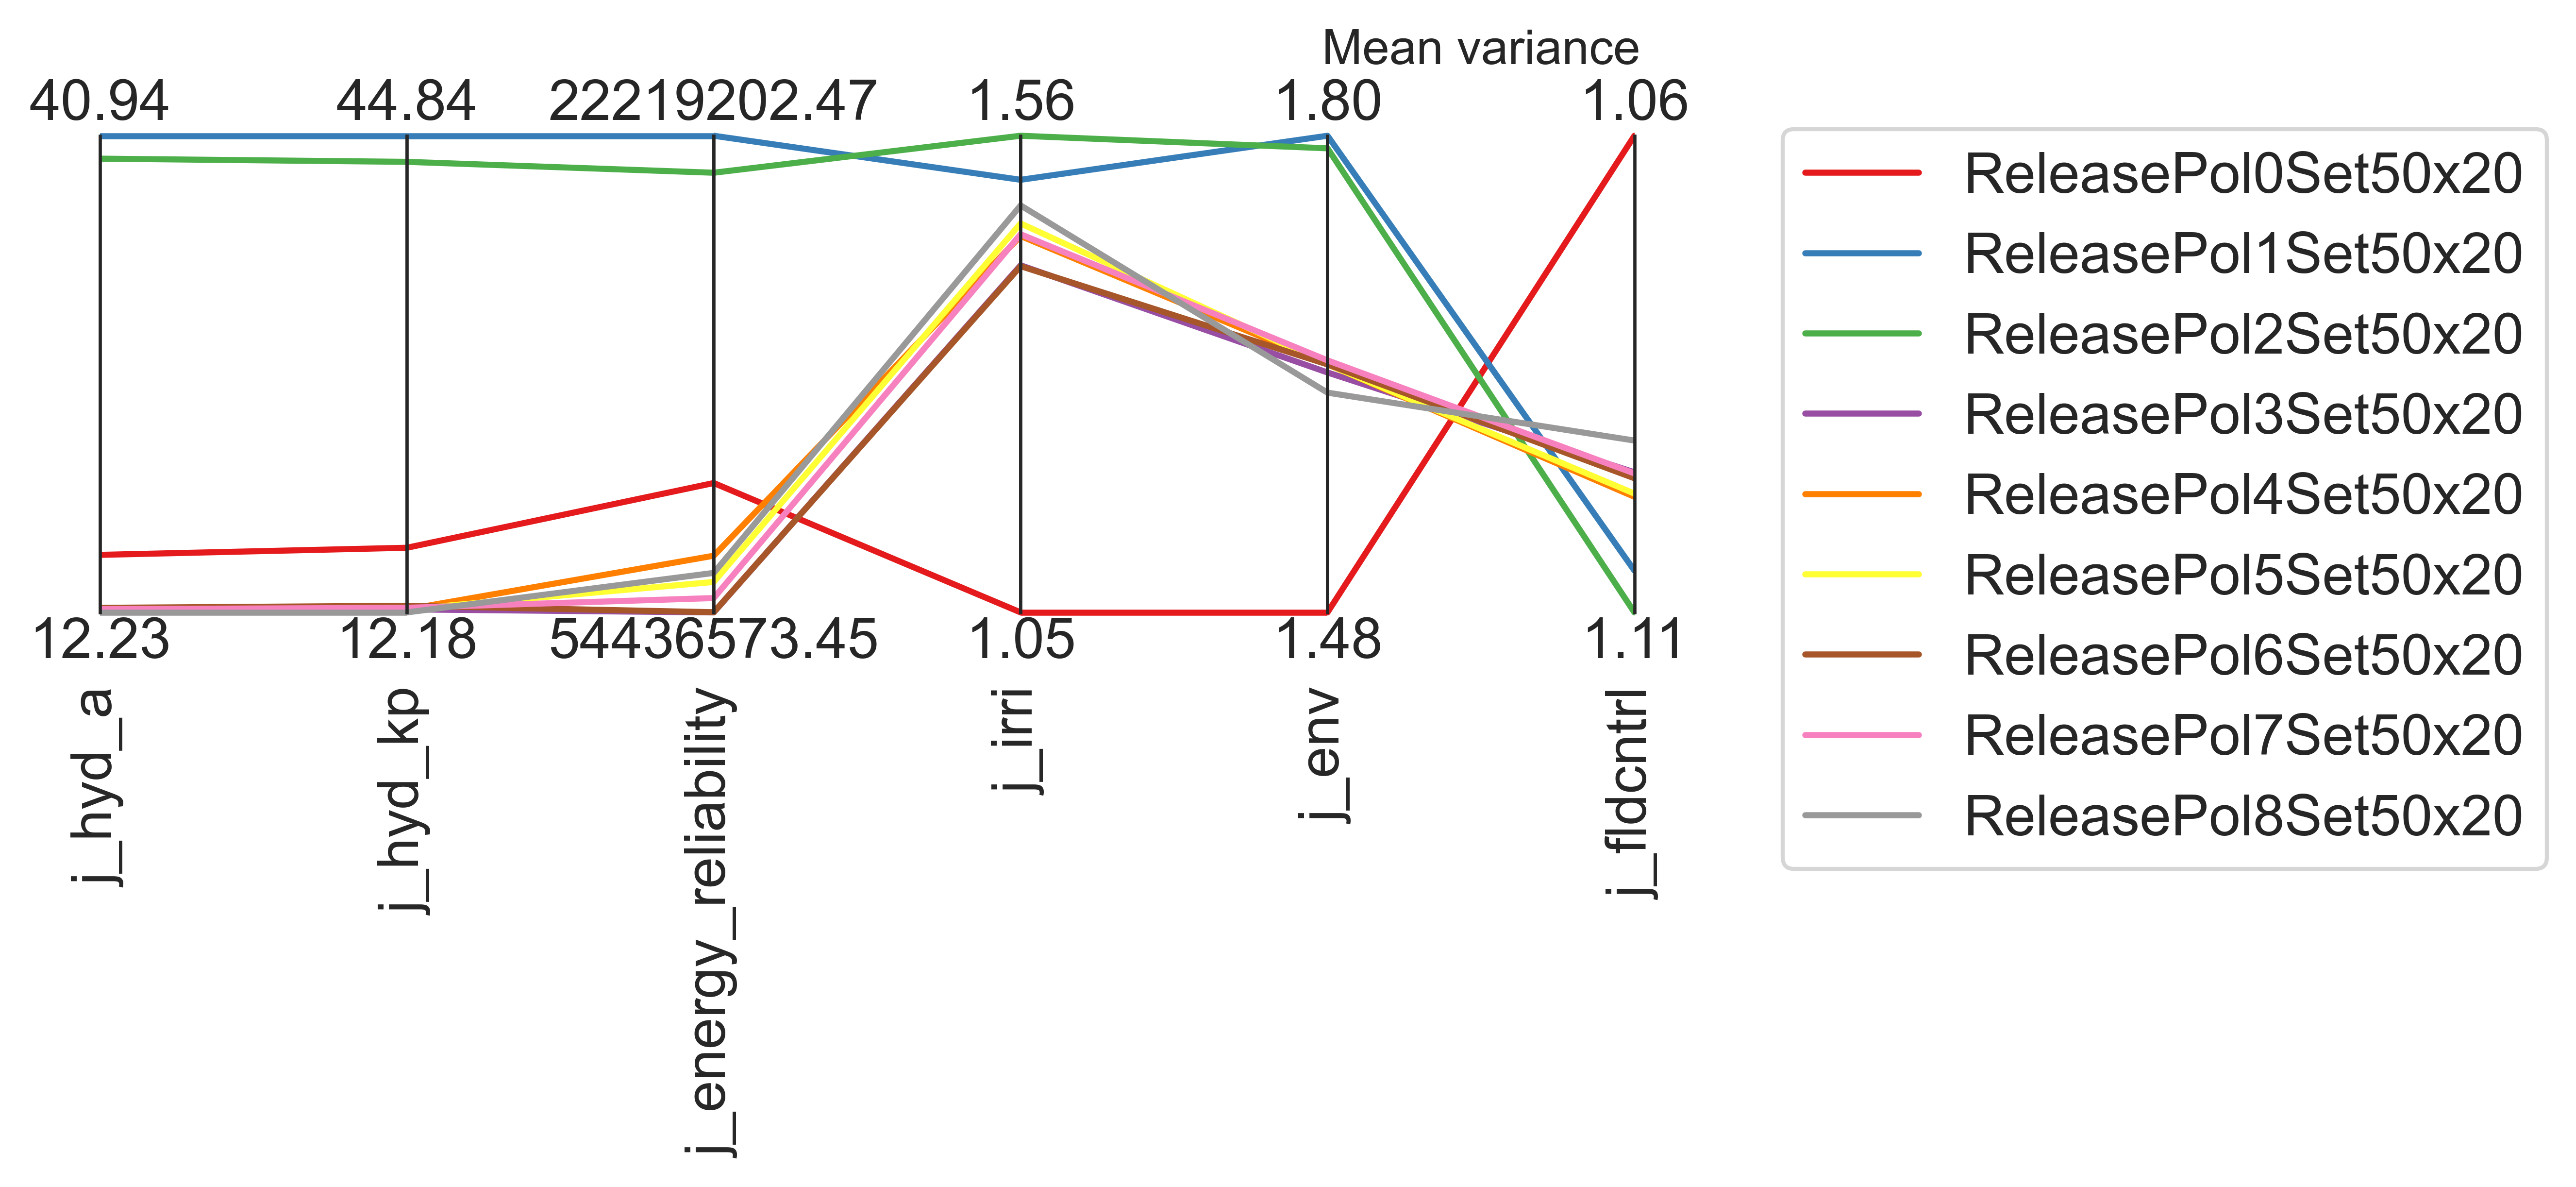

In [13]:

data = mean_variance_df

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()

paraxes.invert_axis('j_energy_reliability')
paraxes.invert_axis('j_fldcntrl')

plt.title('Mean variance')    

plt.savefig('figures/robustness/meanVariance.png', dpi=300)    

plt.show()

In [14]:
percentile_based_peakedness_df = percentile_based_peakedness()
percentile_based_peakedness_df['j_env'] = percentile_based_peakedness_df['j_env'].replace(np.nan, 4)
percentile_based_peakedness_df

j_hyd_a     j_hyd_kp  j_energy_reliability    j_irri  \
ReleasePol0Set50x20  6133.286570  1228.908202           4056.956736  0.091817   
ReleasePol1Set50x20  3671.339686   682.133905          10068.481994  0.978229   
ReleasePol2Set50x20  3544.036691   652.422649           9640.220977  1.093099   
ReleasePol3Set50x20  4794.819992   920.281615           5944.828920  0.918813   
ReleasePol4Set50x20  4718.968631   899.122440           6061.539257  1.004048   
ReleasePol5Set50x20  4678.067284   900.041780           6169.818681  1.040085   
ReleasePol6Set50x20  4708.163788   910.335527           5950.944378  0.927308   
ReleasePol7Set50x20  4694.249759   910.021775           5989.605716  0.989137   
ReleasePol8Set50x20  5042.120460   970.554002           5862.887979  1.021262   

                        j_env  j_fldcntrl  
ReleasePol0Set50x20  0.833170    0.019427  
ReleasePol1Set50x20  2.126766    0.033948  
ReleasePol2Set50x20  2.706176    0.034912  
ReleasePol3Set50x20  4.000000    0.030785  
ReleasePol4Set50x20  4.000000    0.031425  
ReleasePol5Set50x20  4.000000    0.031356  
ReleasePol6Set50x20  4.000000    0.030963  
ReleasePol7Set50x20  4.000000    0.031198  
ReleasePol8Set50x20  4.000000    0.029975

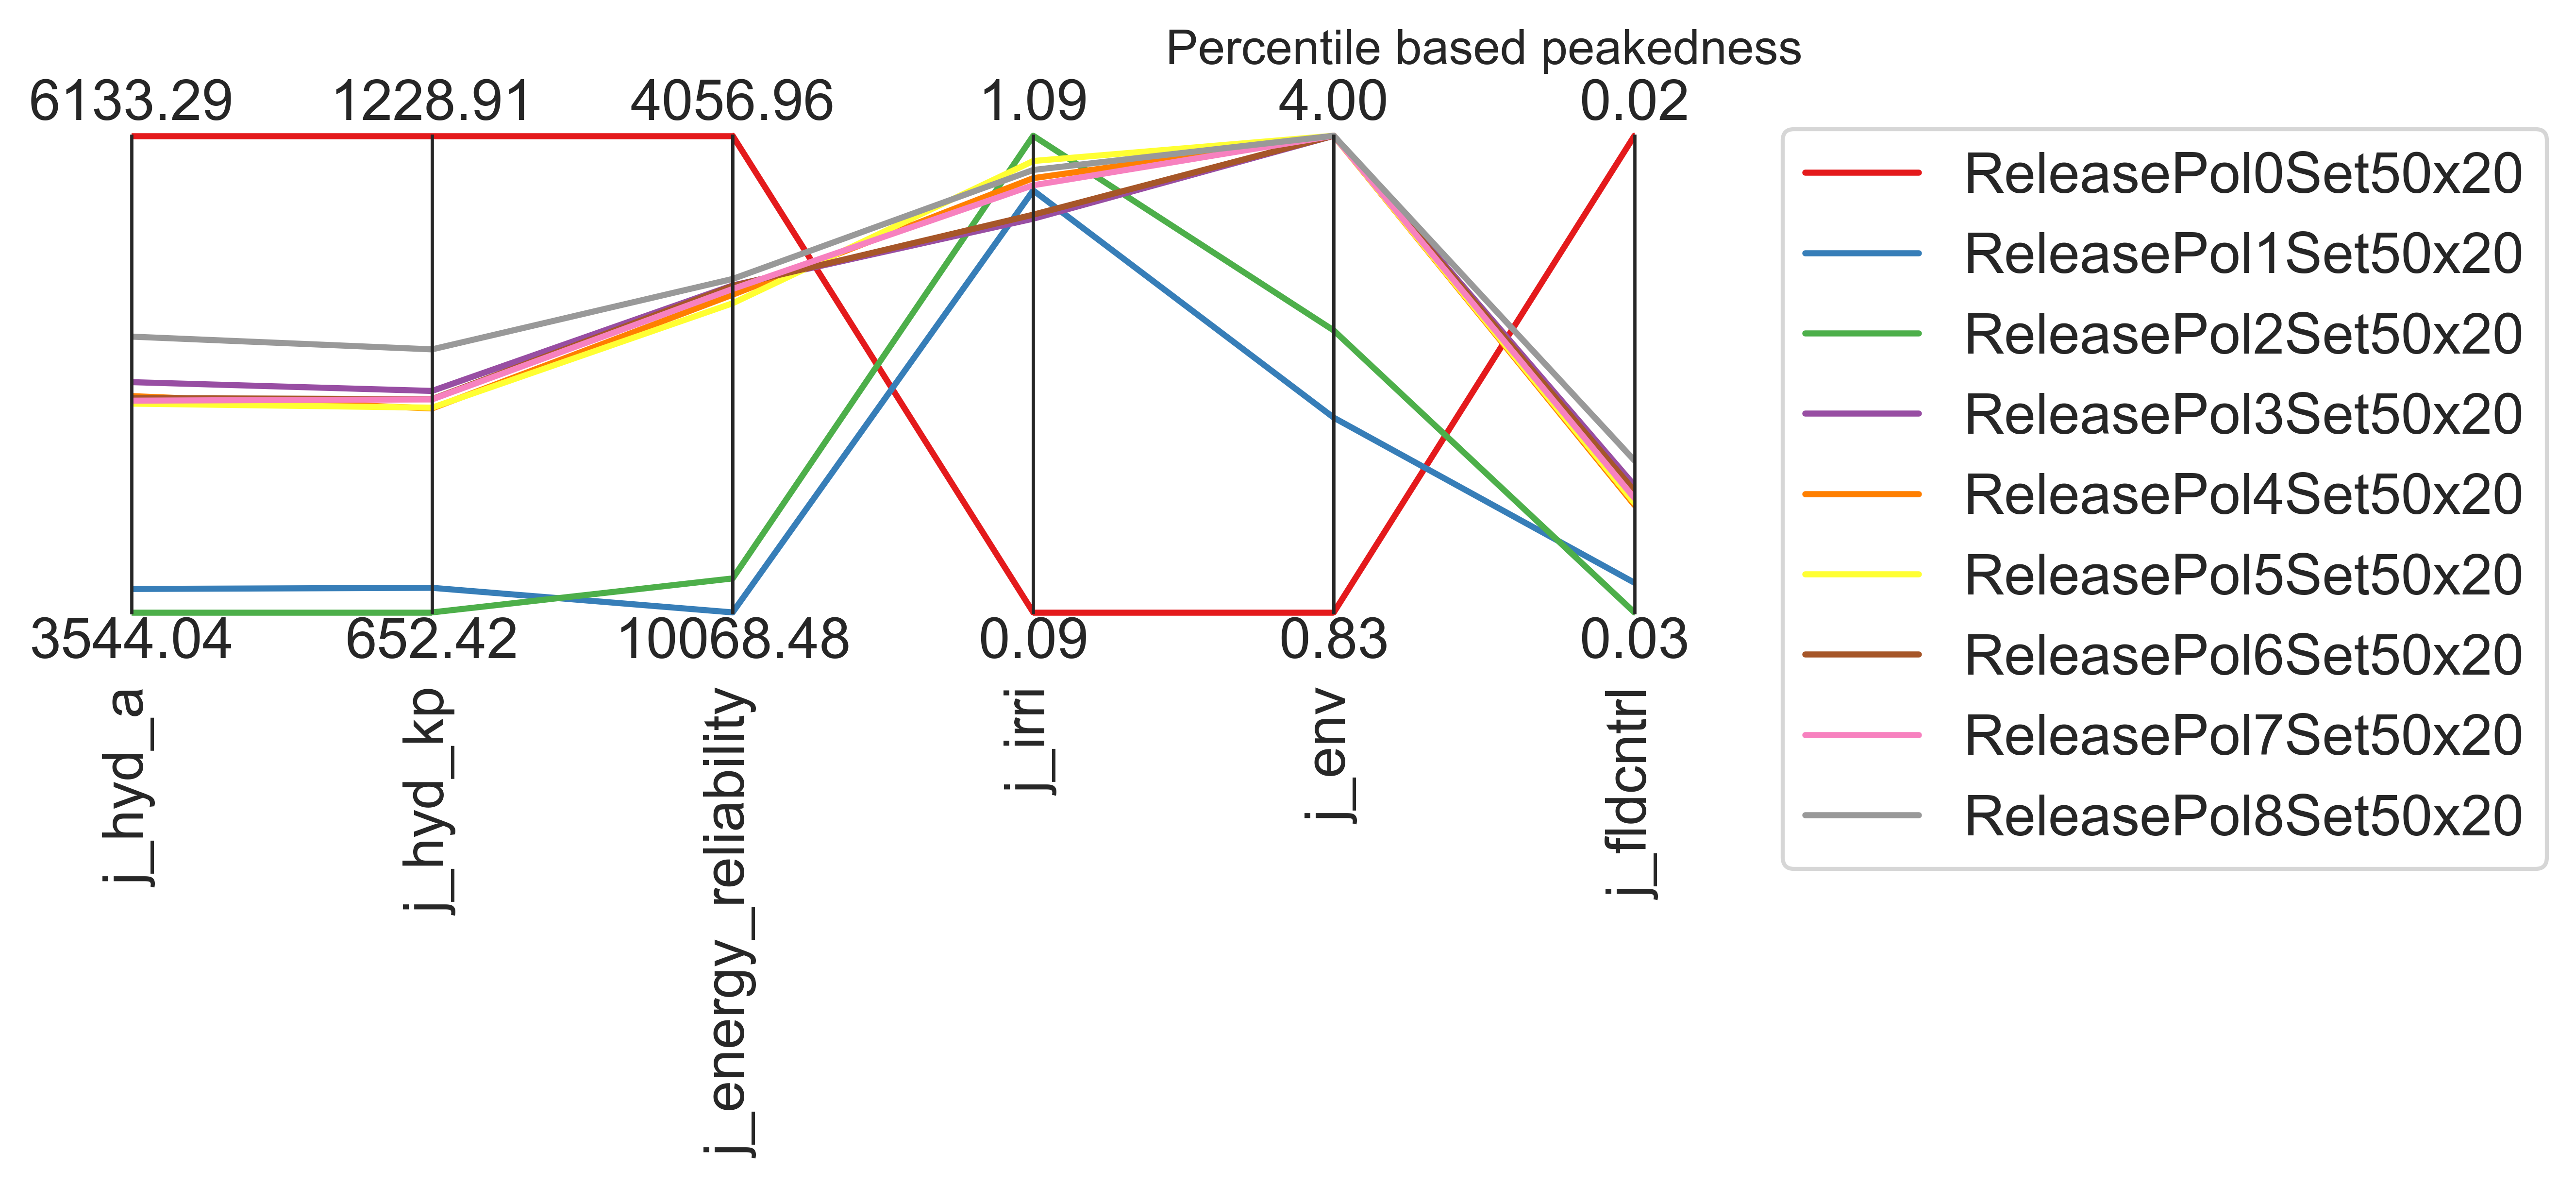

In [15]:

data = percentile_based_peakedness_df

limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()

paraxes.invert_axis('j_energy_reliability')
paraxes.invert_axis('j_fldcntrl')

plt.title('Percentile based peakedness') 
plt.savefig('figures/robustness/peakedness.png', dpi=300)    

plt.show()

## Reevaluation of 'best' in different situations

In [16]:
def plot_robustness(objective):
    scores = pd.DataFrame()
    scores['WP1'] = WP1_df[objective]
    scores['minimax regret90'] = minimax_regret90_df[objective]
    scores['mean_variance'] = mean_variance_df[objective]
    scores['percentile based peakedness'] = percentile_based_peakedness_df[objective]
    
    data = scores

    limits = parcoords.get_limits(data.max())
    limits[0] = parcoords.get_limits(data.min())[0]
    limits = limits.T

    paraxes = parcoords.ParallelAxes(limits)
    for i, (index, row) in enumerate(data.iterrows()):
        paraxes.plot(row.to_frame().T, label=str(index)[0:11], color=colors[i])
    paraxes.legend()
    
    if objective == 'j_fldcntrl' or objective == 'j_energy_reliability':
        paraxes.invert_axis('mean_variance')
        paraxes.invert_axis('WP1')
        
    paraxes.invert_axis('minimax regret90')
    plt.title(objective)
    plt.savefig(f'figures/robustness/{objective}_all_robustness_metrics.png', dpi=300)    

    plt.show()

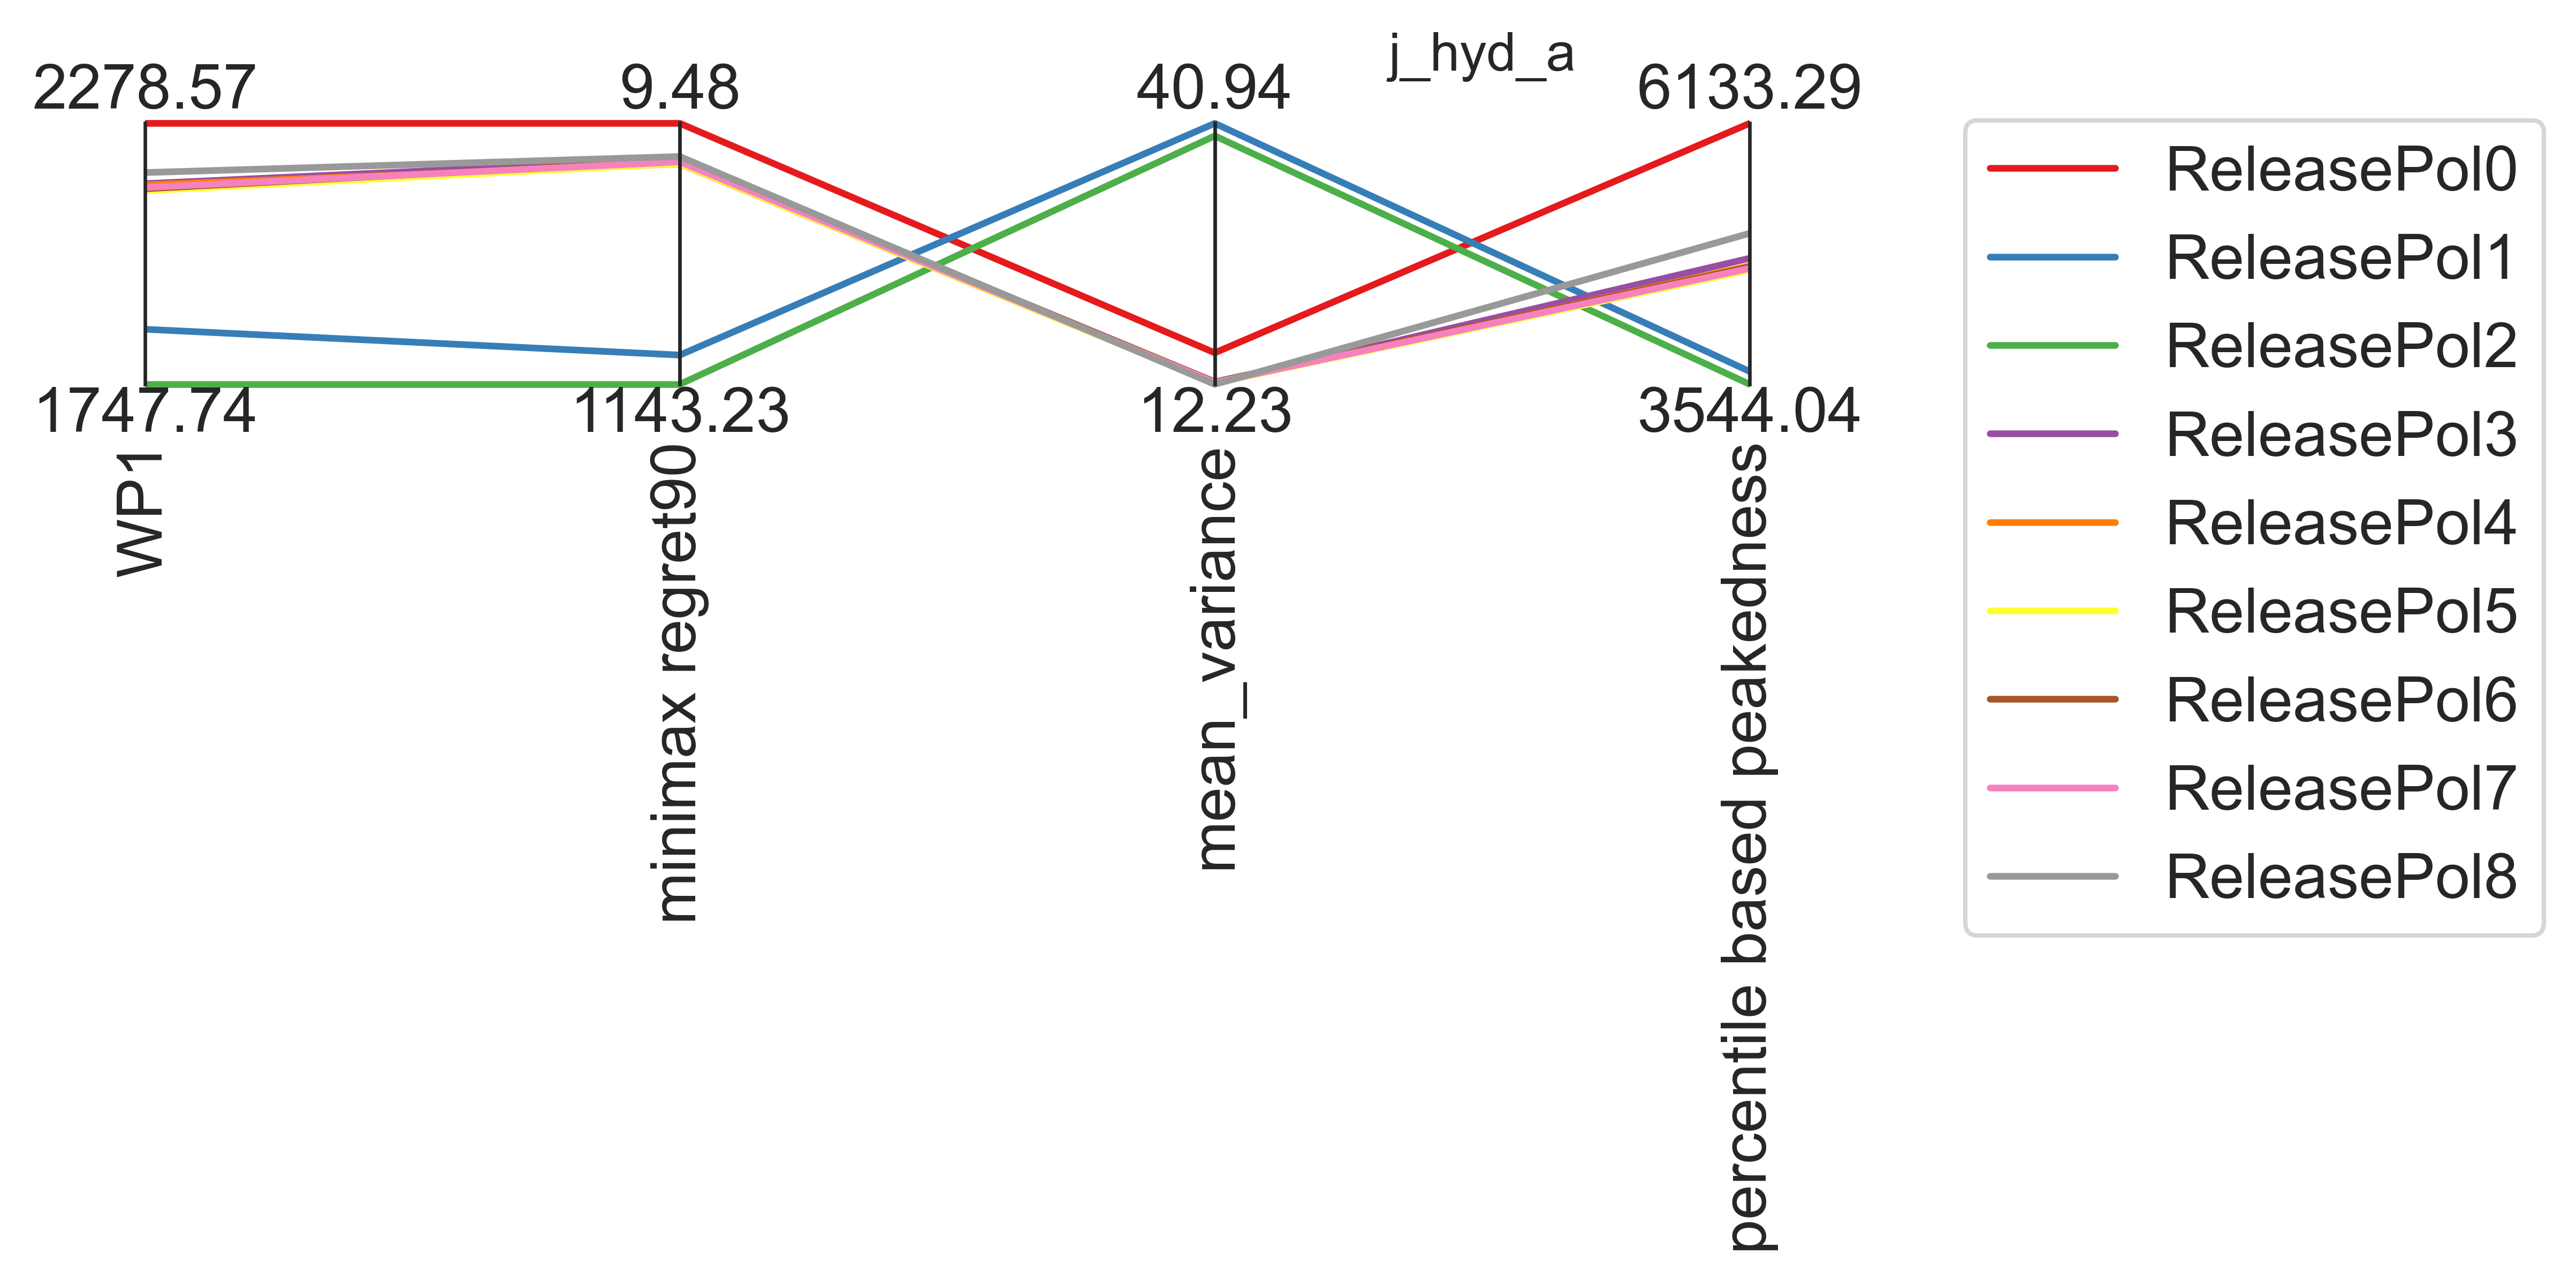

In [17]:
plot_robustness('j_hyd_a')

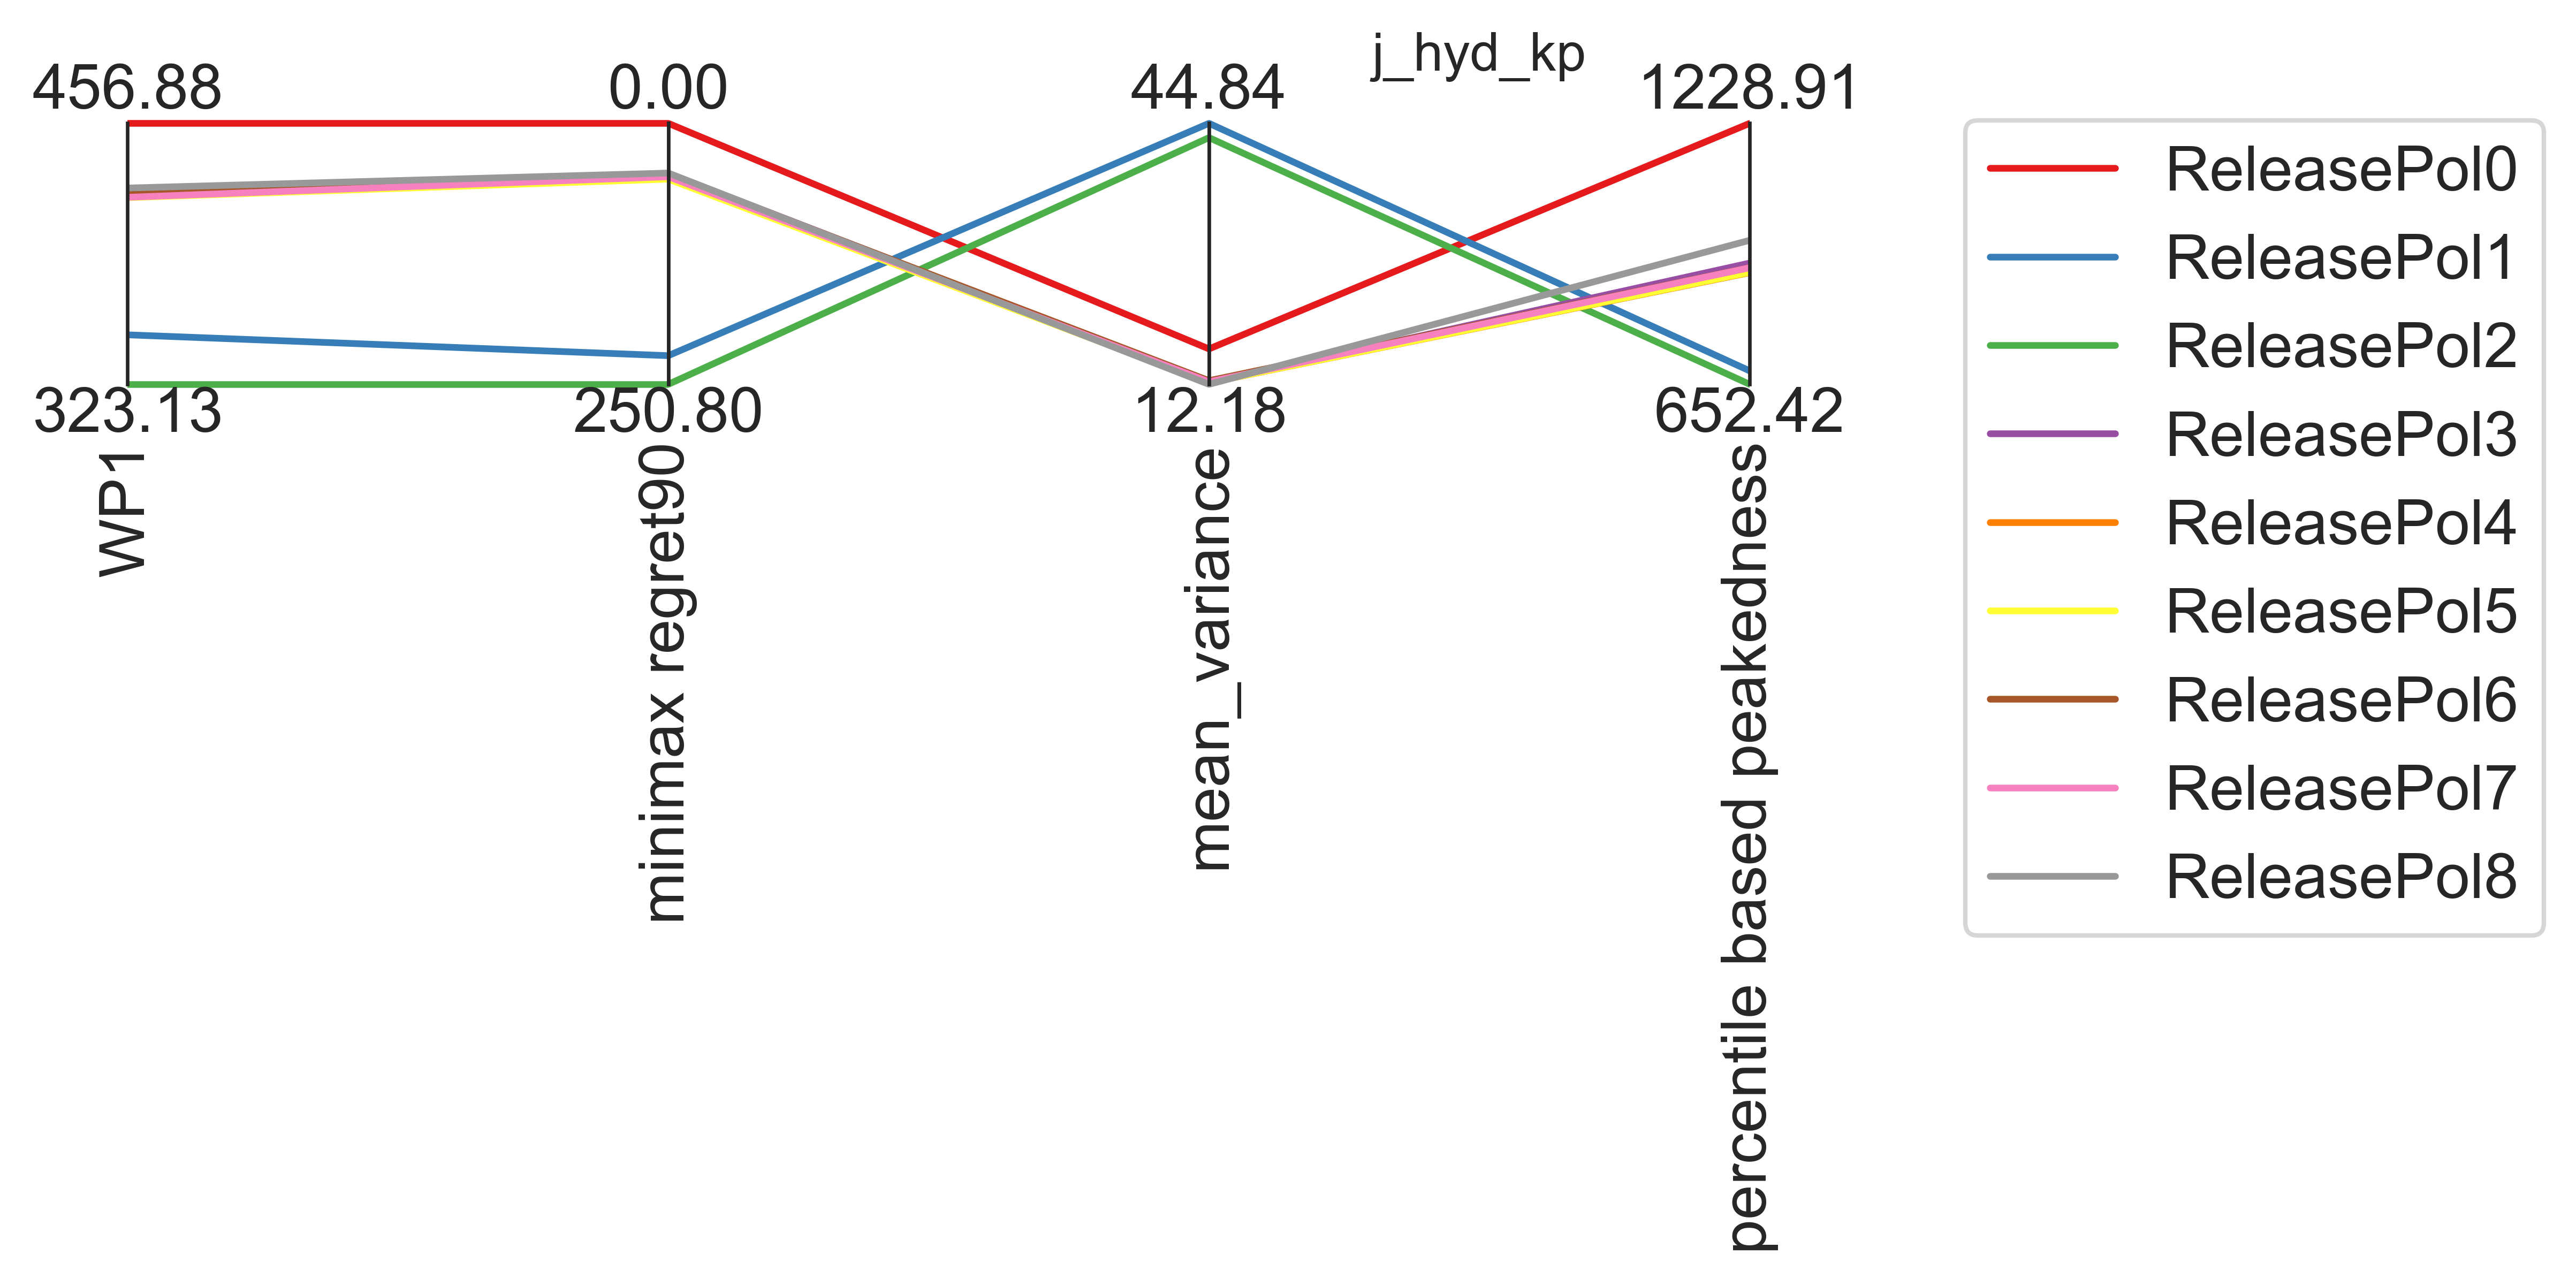

In [18]:
plot_robustness('j_hyd_kp')

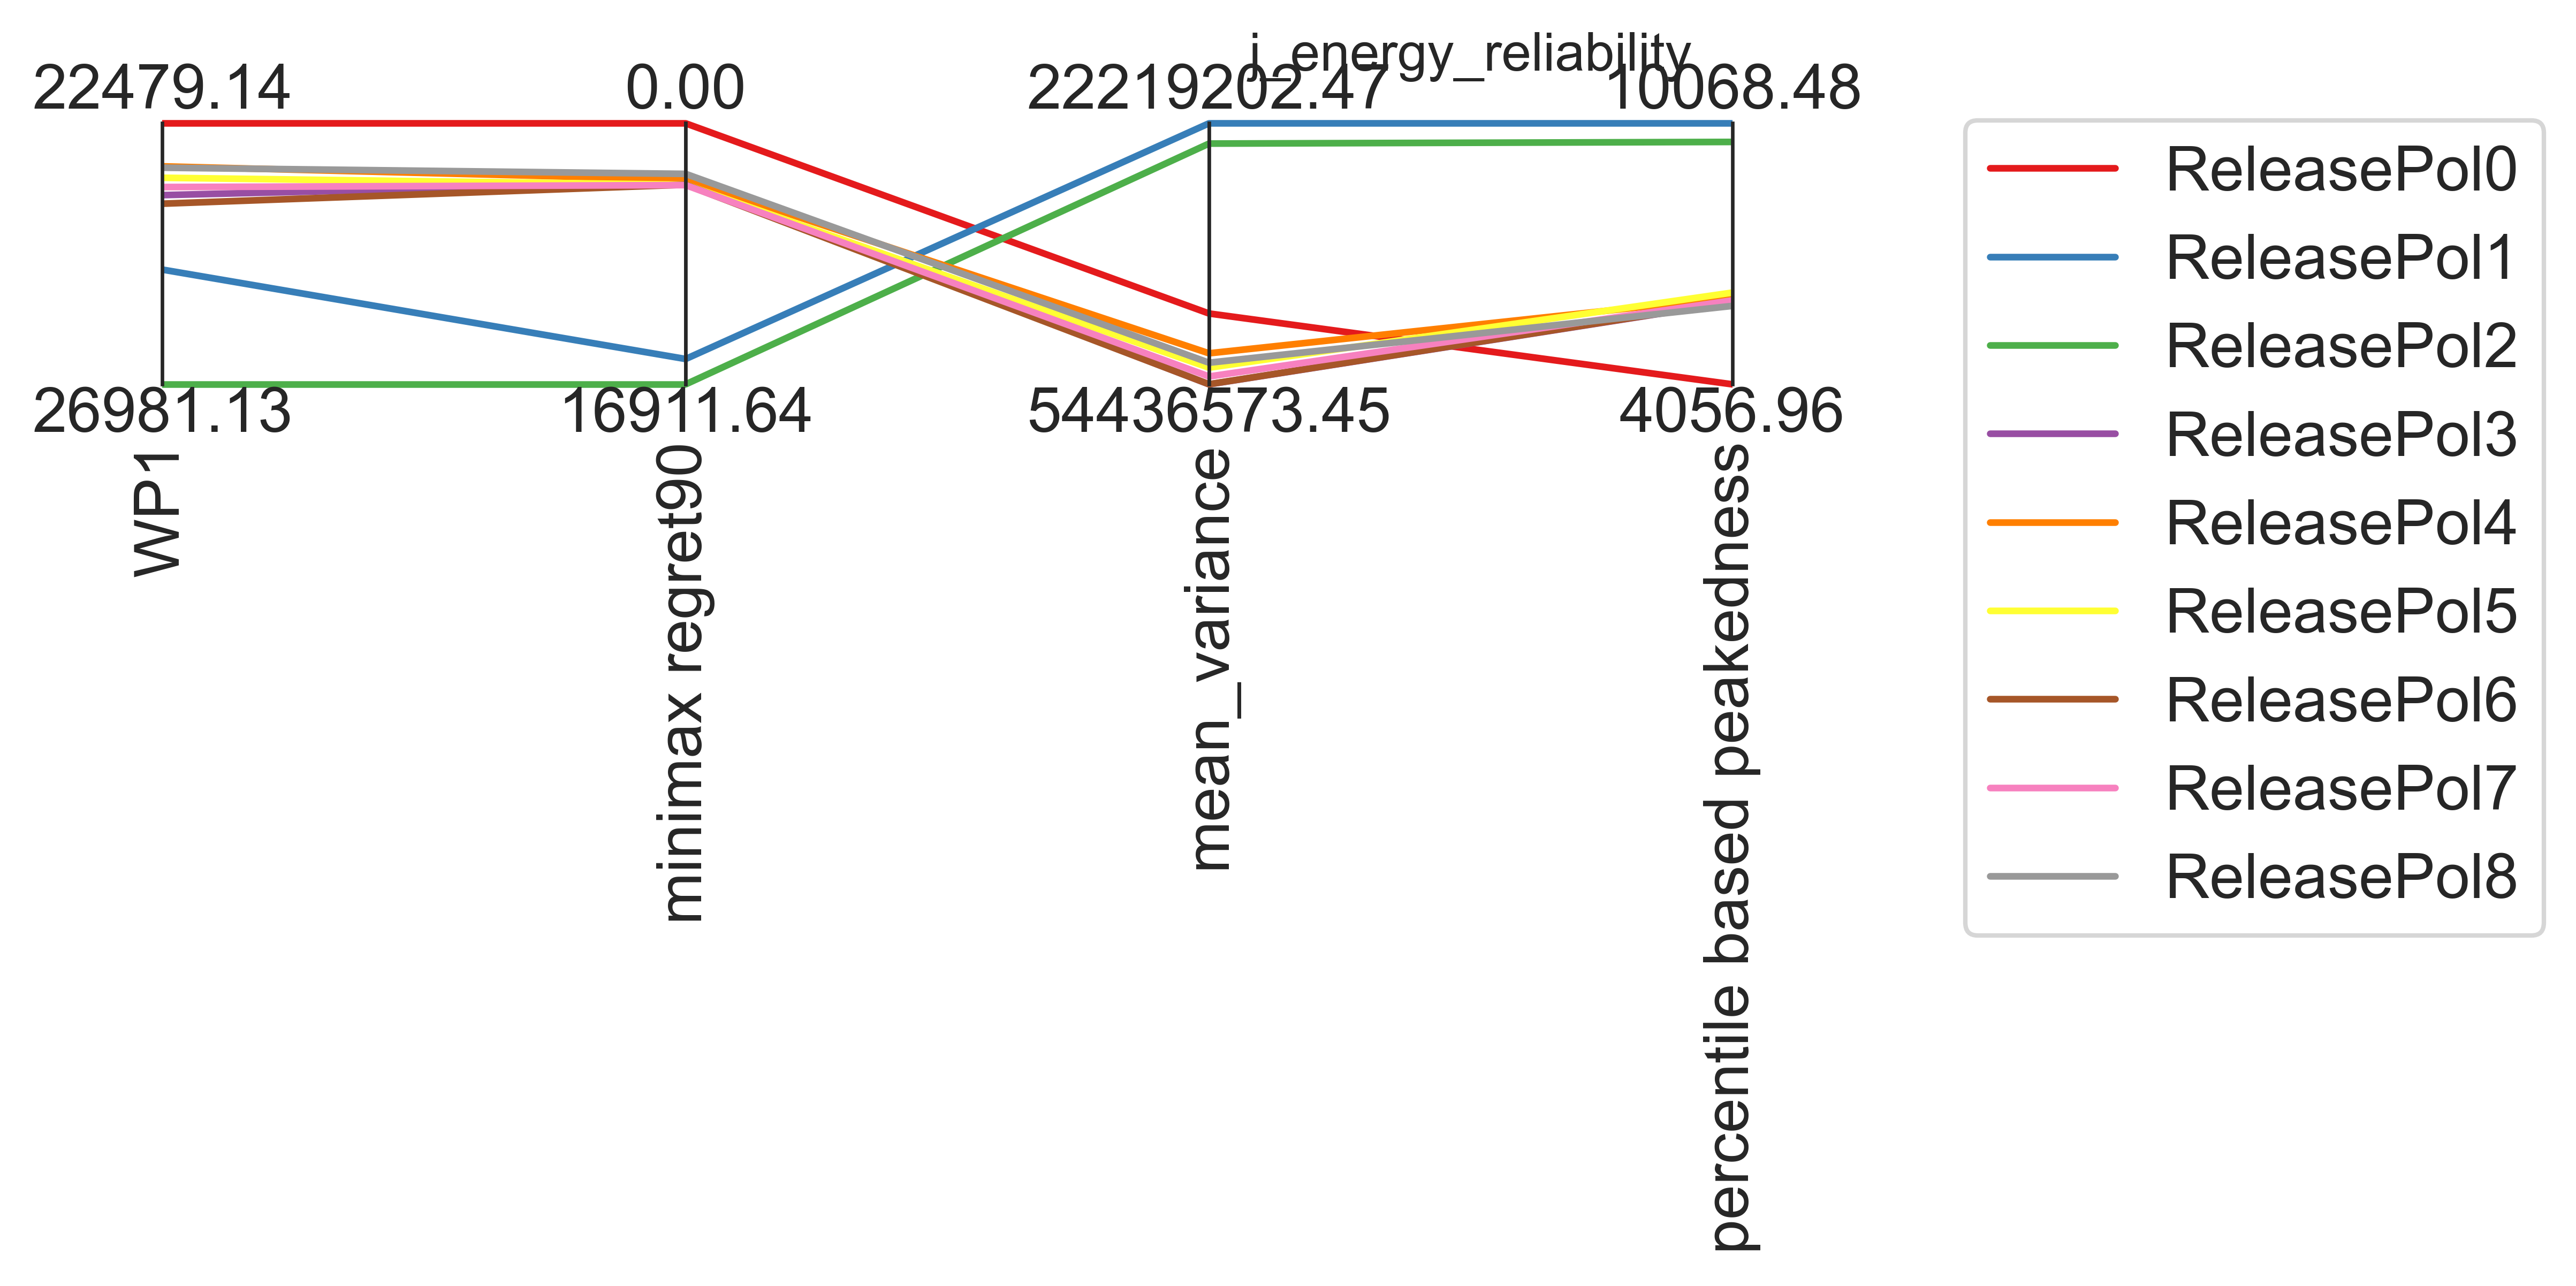

In [19]:
plot_robustness('j_energy_reliability')

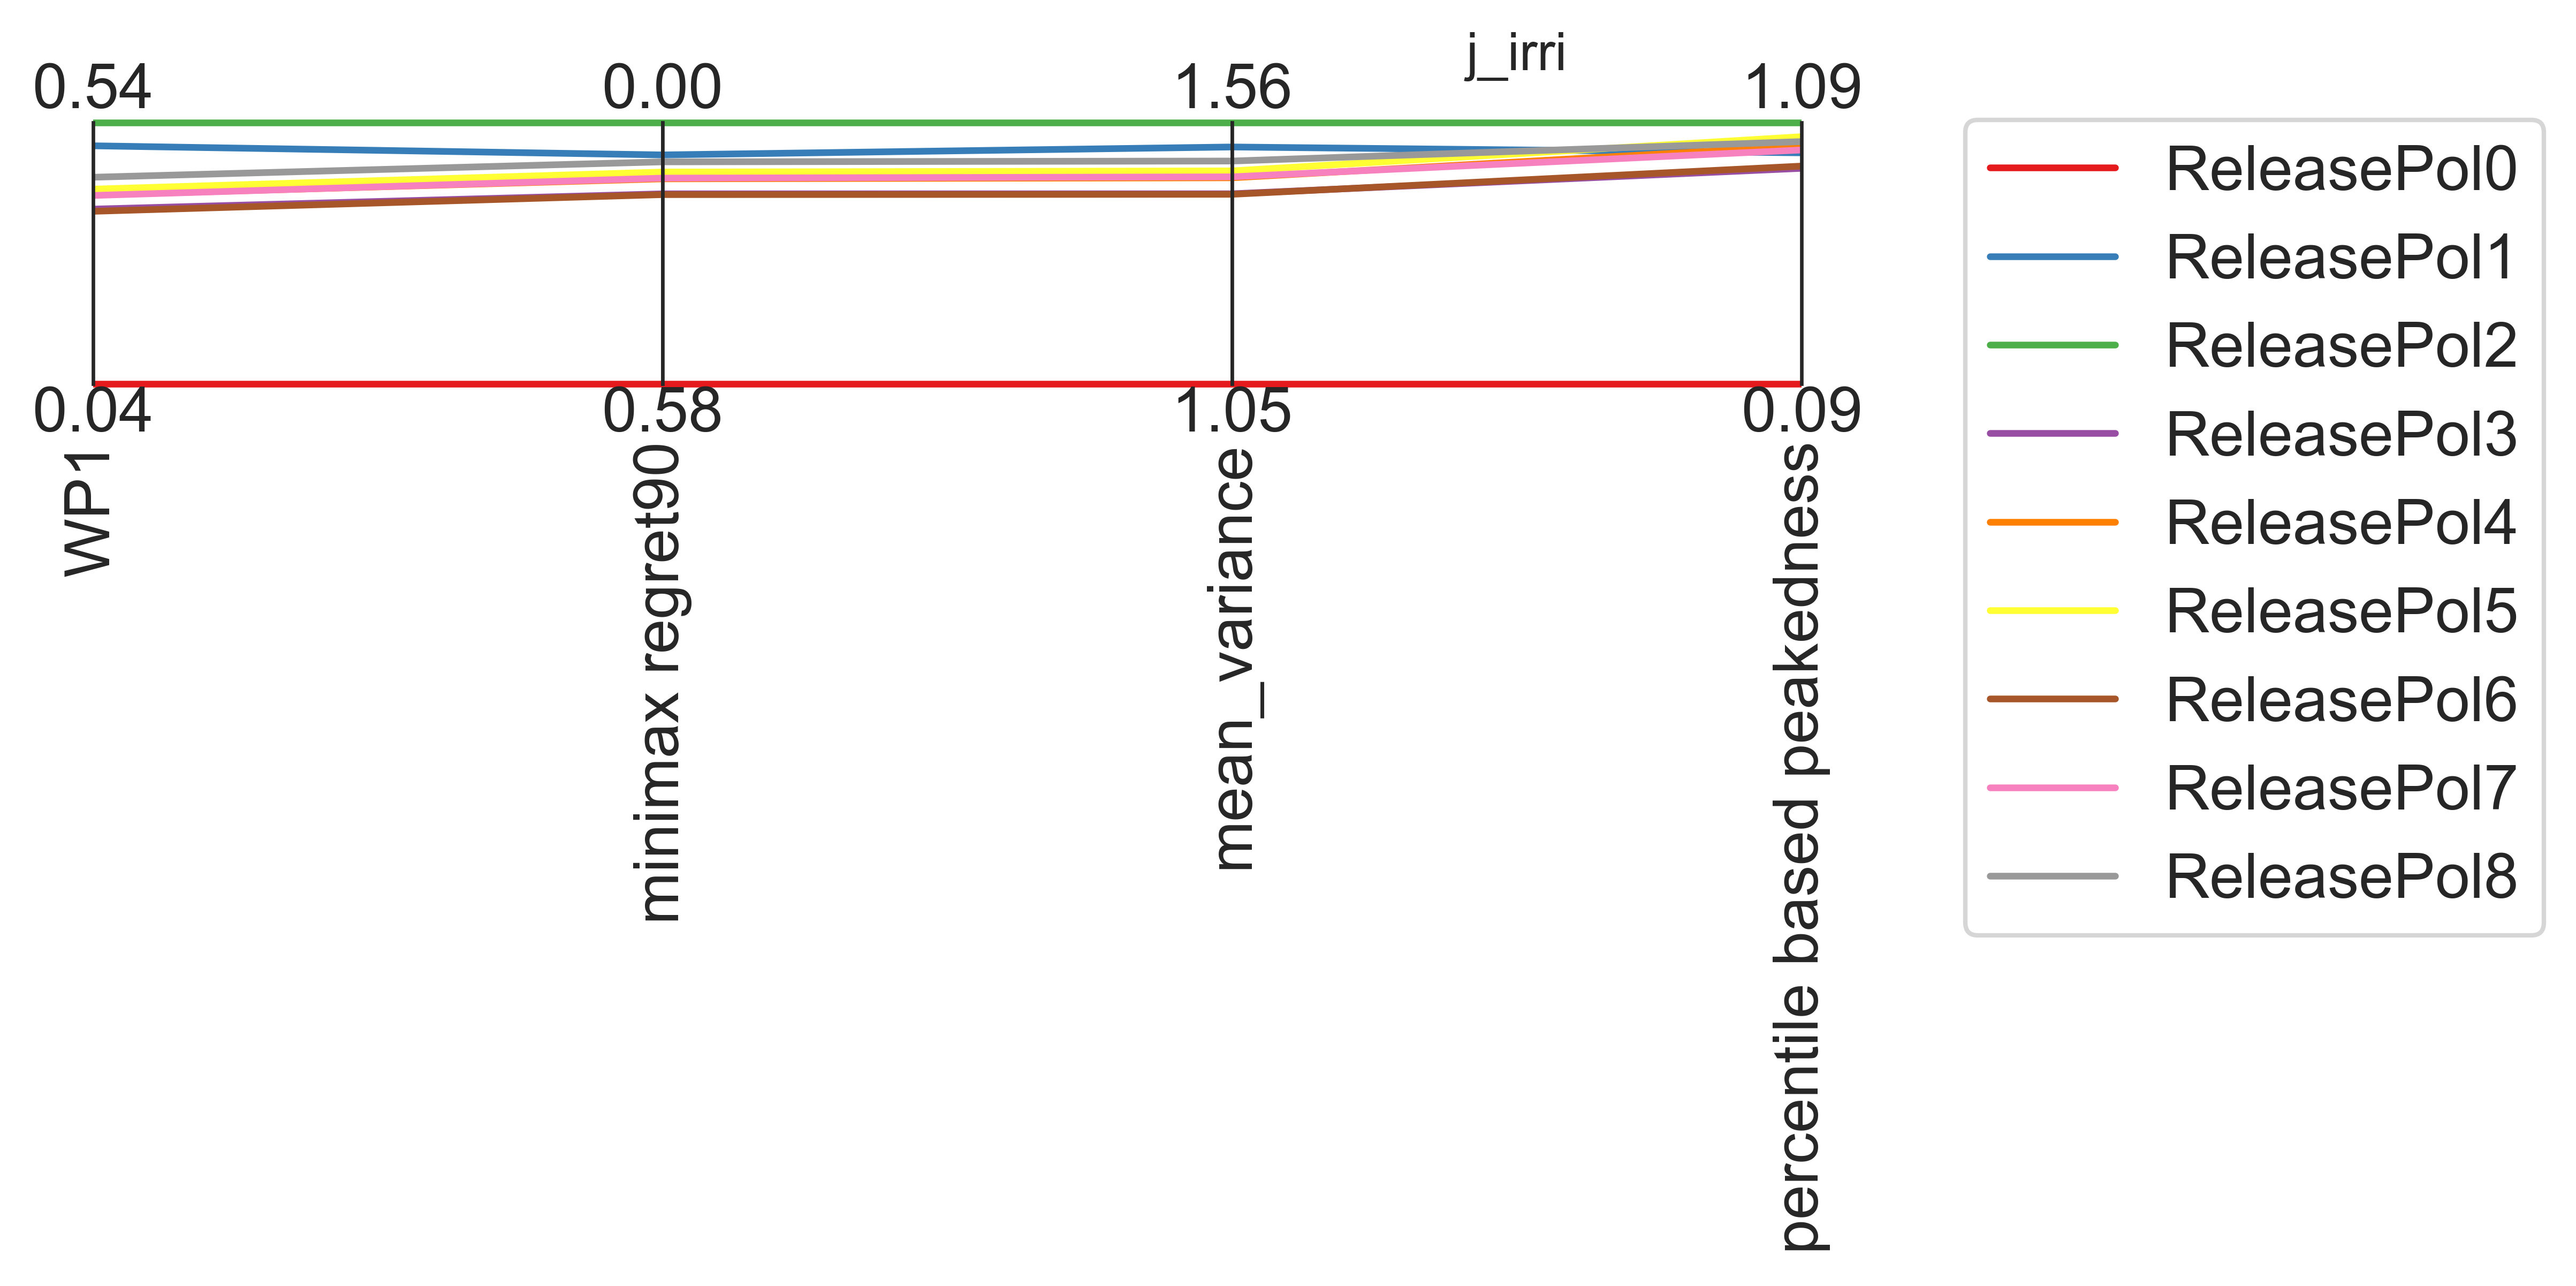

In [20]:
plot_robustness('j_irri')

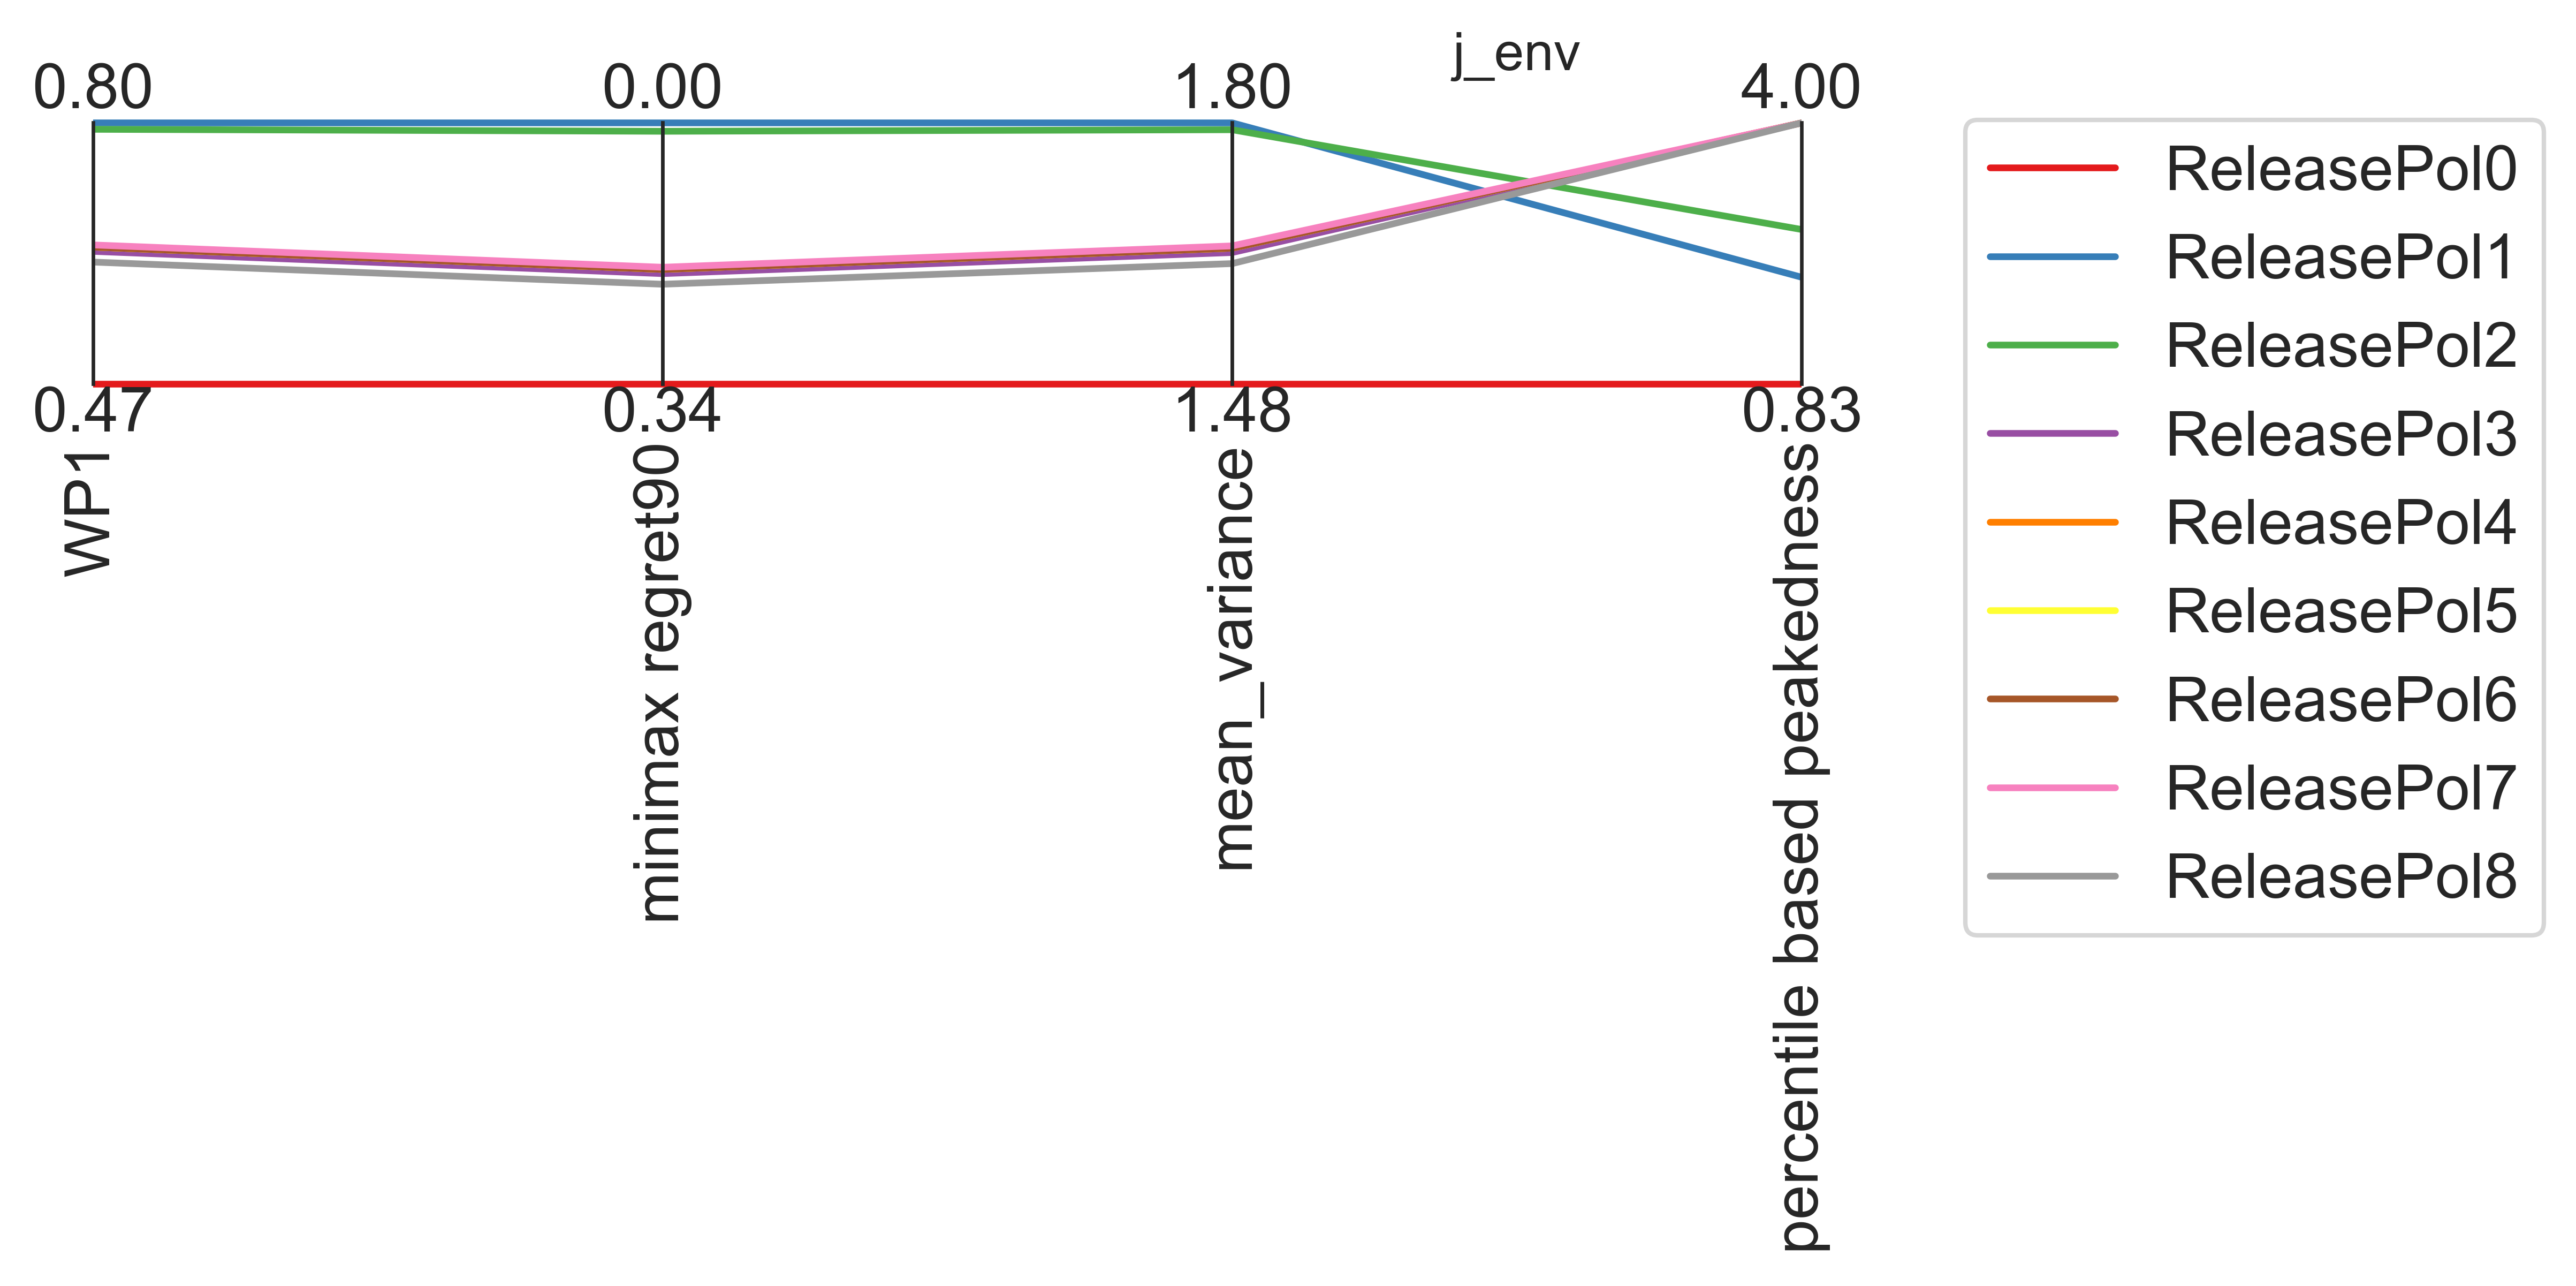

In [21]:
plot_robustness('j_env')

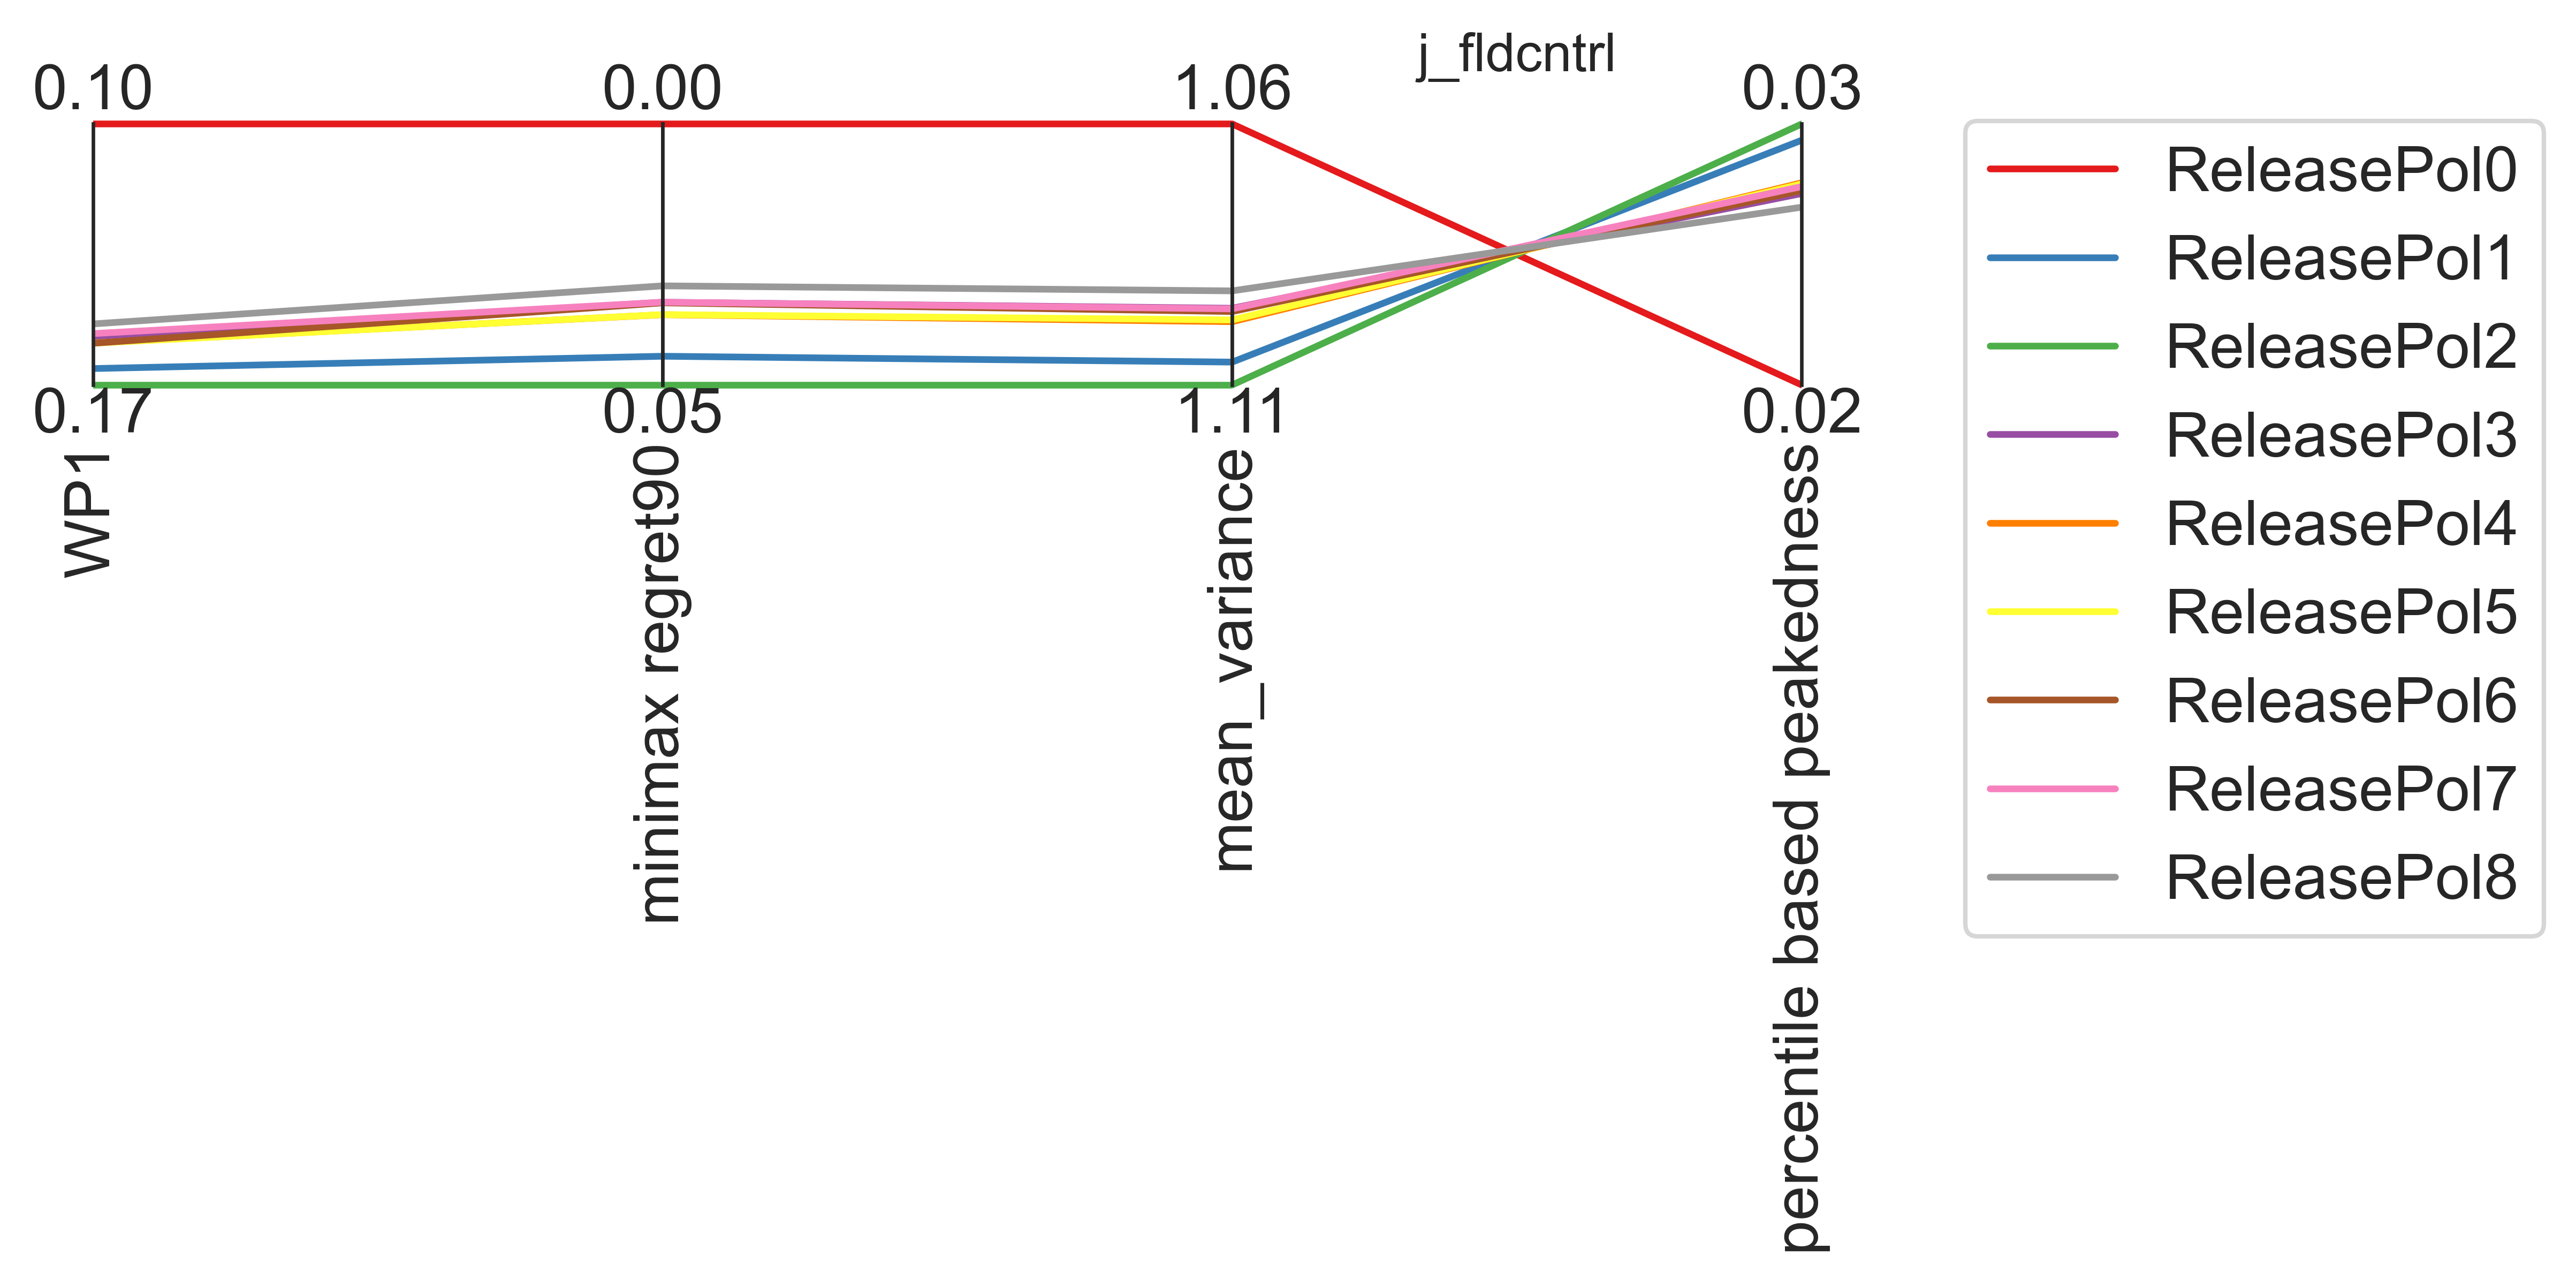

In [22]:
plot_robustness('j_fldcntrl')

## Diverse metrics

In [23]:
diverse_metrics = pd.DataFrame()
diverse_metrics['j_hyd_a_R90'] =  minimax_regret90_df['j_hyd_a']
diverse_metrics['j_hyd_kp_R90'] =  minimax_regret90_df['j_hyd_kp']
diverse_metrics['j_energy_reliability_mean_variance'] =  mean_variance_df['j_energy_reliability']
diverse_metrics['j_irri_mean_variance']=  mean_variance_df['j_irri']
diverse_metrics['j_env_peakedness'] =  percentile_based_peakedness_df['j_env']
diverse_metrics['j_fldcntrl_WP1'] = WP1_df['j_fldcntrl']

In [24]:
diverse_metrics

j_hyd_a_R90 j_hyd_kp_R90  \
ReleasePol0Set50x20     9.478572          0.0   
ReleasePol1Set50x20  1016.047661   223.262304   
ReleasePol2Set50x20  1143.226593   250.803179   
ReleasePol3Set50x20   165.898944    47.996561   
ReleasePol4Set50x20   185.389691     52.90326   
ReleasePol5Set50x20    184.18652    53.613547   
ReleasePol6Set50x20    170.61936    48.862703   
ReleasePol7Set50x20    176.84415    51.283547   
ReleasePol8Set50x20   153.572842    47.781644   

                     j_energy_reliability_mean_variance  j_irri_mean_variance  \
ReleasePol0Set50x20                        4.569198e+07              1.046927   
ReleasePol1Set50x20                        2.221920e+07              1.509460   
ReleasePol2Set50x20                        2.471871e+07              1.556551   
ReleasePol3Set50x20                        5.443657e+07              1.418071   
ReleasePol4Set50x20                        5.060629e+07              1.449350   
ReleasePol5Set50x20                        5.237978e+07              1.462797   
ReleasePol6Set50x20                        5.442509e+07              1.417121   
ReleasePol7Set50x20                        5.346856e+07              1.451200   
ReleasePol8Set50x20                        5.176819e+07              1.482053   

                     j_env_peakedness  j_fldcntrl_WP1  
ReleasePol0Set50x20          0.833170        0.098794  
ReleasePol1Set50x20          2.126766        0.163866  
ReleasePol2Set50x20          2.706176        0.168238  
ReleasePol3Set50x20          4.000000        0.155334  
ReleasePol4Set50x20          4.000000        0.157053  
ReleasePol5Set50x20          4.000000        0.157129  
ReleasePol6Set50x20          4.000000        0.157138  
ReleasePol7Set50x20          4.000000        0.154570  
ReleasePol8Set50x20          4.000000        0.151994

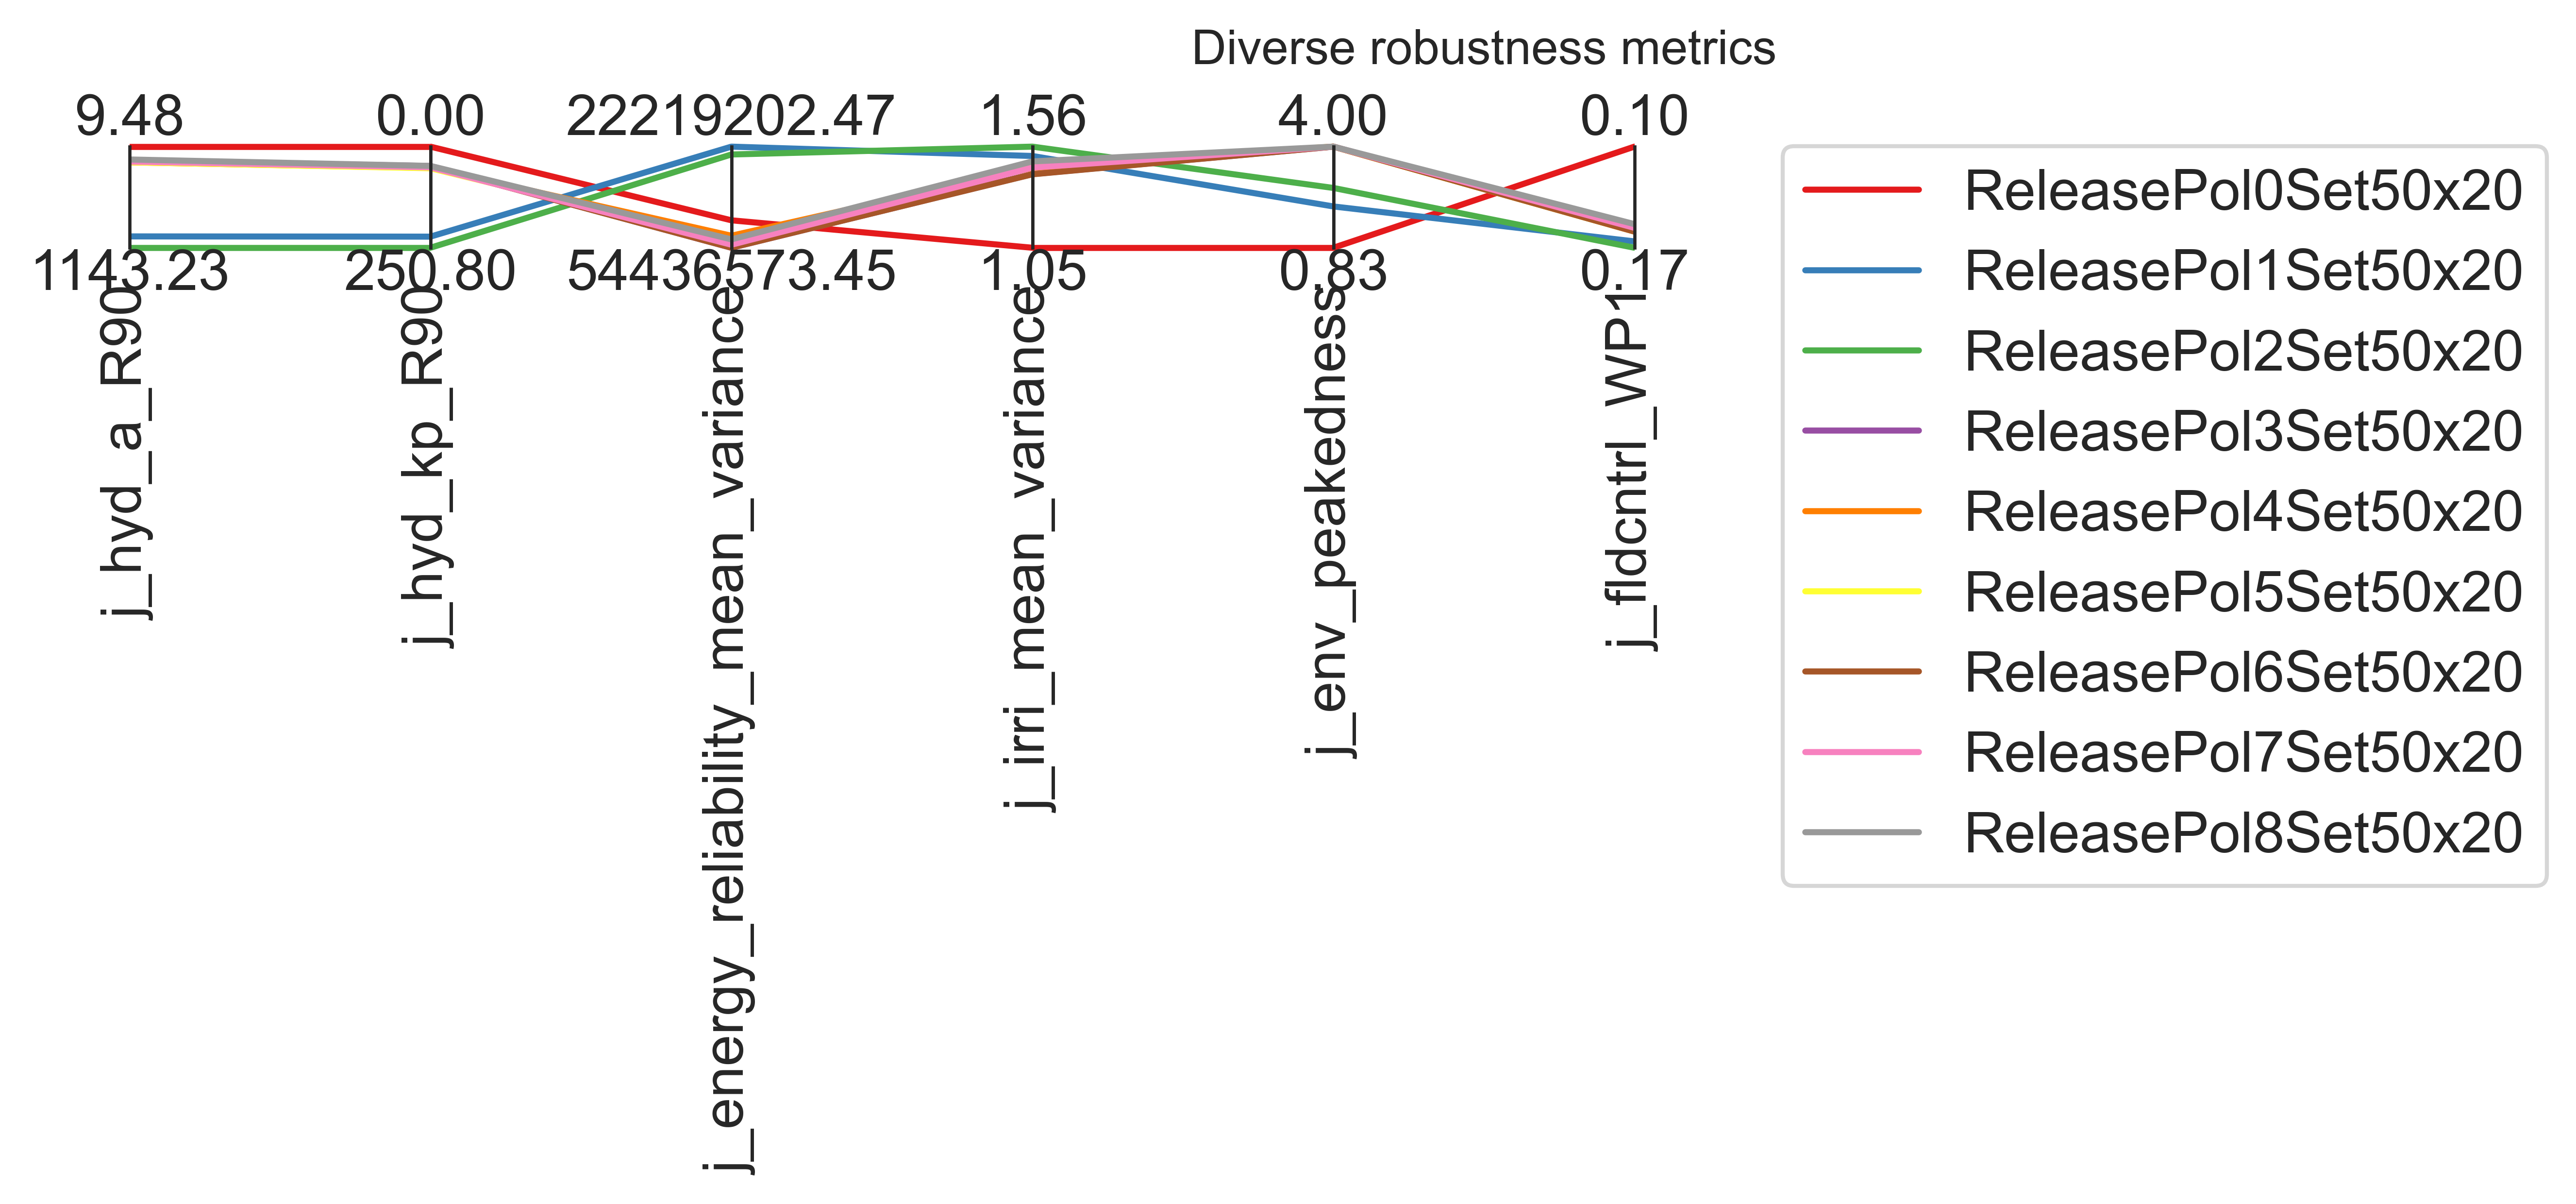

In [25]:
data = diverse_metrics

limits = parcoords.get_limits(data.max())
limits[0] = parcoords.get_limits(data.min())[0]
limits = limits.T

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()
plt.title('Diverse robustness metrics', y=1.4)
paraxes.invert_axis('j_hyd_a_R90')
paraxes.invert_axis('j_hyd_kp_R90')
paraxes.invert_axis('j_energy_reliability_mean_variance')
paraxes.invert_axis('j_fldcntrl_WP1')
plt.savefig('figures/robustness/diverse_metrics_all_objectives.png', dpi=300)    

plt.show()